# Predicting the Severity of Wildfires
## Hanna Asefaw
### TDI Spring 2021- West Coast Cohort

# 1. Retrieve and Format the Data
##### &emsp;  a. California Wildfires
##### &emsp;  b. Soil Moisture 
##### &emsp;  c. Precipitation 
##### &emsp;  d. Surface Temperature 
##### &emsp;  e. Land Cover 

# 2. Exploratory Data Analysis and Visualizations
##### &emsp; a. Distribution
##### &emsp;b. Scatter Plot
##### &emsp; c. Joint Plot
##### &emsp; d. Correlation
##### &emsp;e. Grouped by month
&emsp; &emsp; i.   Distribution <br>
&emsp; &emsp; ii.  Count <br>
&emsp; &emsp; iii. Sum Total <br>
&emsp; &emsp; iv.  Box Plot <br>
&emsp; &emsp; v.   Summary Statistics
##### &emsp; f. Maps



# 3. Analysis
##### &emsp; a.  Predict the number of acres burned, given a wildfire occurs,
&emsp; &emsp; i. Linear Regression Model <br>
&emsp; &emsp; &emsp; I. entire dataset <br>
&emsp; &emsp; &emsp; II. partial dataset  - training set, testing set <br>
&emsp; &emsp; &emsp; III. polynomial features <br>
&emsp; &emsp; &emsp; IV. ridge <br>
&emsp; &emsp; ii. Decision Tree Regressor Model <br>
&emsp; &emsp; &emsp; I. model <br>
&emsp; &emsp; &emsp; II. feature relevance <br>

&emsp; &emsp; iii. Random Forest Regressor Model <br>
&emsp; &emsp; &emsp; I.model <br>
&emsp; &emsp; &emsp; II. comparison between Decision Tree, Random Forest, Extra Random Forest

##### &emsp; b. Predict Regional Wildfire Probability Risk

In [34]:
import pandas as pd
import numpy as np
import pygmt


import warnings
warnings.filterwarnings("ignore") 

import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(20,10)})

# 1. Retrieve and Format the Data

### &emsp; a. California Wildfires <br>
The California Department of Forestry and Fire Protection (Cal Fire) is responsible for protecting and preserving the forests in Calfironia. Cal Fire prevents wildfires by conducting prescribed burns, forest health treatments, and hazardous vegetation removal. When wildfires occur CalFire coordinates with local emergency response agencies to control the wildfire. They deploy firefghters and their aerial firefighting fleet to supress wildfires. 

The [CALFire website](https://www.fire.ca.gov/incidents/) lists the wildfires that occured in California since 2013. Each wildfire includes the date it began, the number of acres that were burned over its run, the location, and additional information. 

A downloadable file was not available, so I wrote a webscraper to retrieve the data. You can find the implementation in ScrapeCalFire.py. Here we will use the function get_ca_wildfires() to download the data and save it to Data/CalFires.csv

In [35]:
from ScrapeCalFire import get_ca_wildfires 


# uncomment to test the webscraper, but the file already exists in this directpry
#get_ca_wildfires("Data/CalFires.csv")

Now that we have the California wildfire data, we can view the contents. To keep the final size of all the data manageable, we'll filter the wildfires to those in the San Francisco region. 

In [36]:
wildfire_data = pd.read_csv("Data/CalFires.csv")
wildfire_data = wildfire_data[wildfire_data['Year']>=2010]


sf_lats, sf_lons = [36.8, 38.4], [-123.17,-120.37]
sf_data = wildfire_data[(wildfire_data['Latitude']> sf_lats[0]) &( wildfire_data['Latitude']< sf_lats[1])\
            & (wildfire_data['Longitude']> sf_lons[0]) & (wildfire_data['Longitude']< sf_lons[1])]

print("Total wildfires in the SF region:\t\t{}".format(sf_data['Location'].size))

Total wildfires in the SF region:		245


We'll sort the wildfires by the number of acres burned and focus on the 5 largest wildfires in the San Francisco Region.

In [37]:
sf_data = sf_data.dropna(subset = ['AcresBurnedDisplay'])
sf_data = sf_data.sort_values(['AcresBurnedDisplay'], ascending =False)

n = np.arange(5)
selected_wf = sf_data.iloc[n] 
selected_wf

IncidentId                              UniqueId  \
1808        2580  22c6ea3c-304c-4b3b-bfba-7c9dfc63d9da   
1807        2577  d19ac7c7-c899-4600-82c9-fe24dc29f3c9   
409         1066  13466833-32d1-418b-b145-f7ce1f7bf66e   
981         1640  676946dc-1b38-4a09-9bbe-9ce638cfed52   
1154        1812  4efc7855-ecbf-4507-8435-399e23a91fef   

                                                  Name  \
1808                             SCU Lightning Complex   
1807  CZU Lightning Complex (Including Warnella Fire)    
409                                         Butte Fire   
981                  Atlas Fire (Southern LNU Complex)   
1154                                      Waverly Fire   

                                               Location   Latitude  \
1808  Multiple locations throughout Santa Clara Coun...  37.439437   
1807  Various locations across San Mateo and Santa C...  37.171620   
409                                     east of Jackson  38.329740   
981       Off of Altas Peak Rd, south of Lake Berryessa  38.392060   
1154  off North Waverly Road and North Shelton Road,...  38.052055   

       Longitude  AcresBurnedDisplay PercentContainedDisplay  \
1808 -121.304350            396624.0                    100%   
1807 -122.222750             86509.0                    100%   
409  -120.704180             70868.0                    100%   
981  -122.243670             51624.0                    100%   
1154 -120.945482             12300.0                    100%   

                                           CountiesList          UpdatedDate  \
1808  Santa Clara, Alameda, Contra Costa, San Joaqui...  2020-10-01 10:29:40   
1807                              Santa Cruz, San Mateo  2020-09-23 15:43:36   
409                                                 NaN  2015-10-15 19:45:00   
981                                        Napa, Solano  2019-10-25 08:47:30   
1154                                        San Joaquin  2019-10-25 09:32:06   

     StartedDate                                          AdminUnit  \
1808  2020-08-18                          CAL FIRE Santa Clara Unit   
1807  2020-08-16  Unified Command Agencies: Santa Cruz Co. Sheri...   
409   2015-09-09                   CAL FIRE Amador - El Dorado Unit   
981   2017-10-08                     CAL FIRE Sonoma-Lake-Napa Unit   
1154  2018-06-29                   CAL FIRE Tuolumne-Calaveras Unit   

     IncidentTypeDisplay                                                Url  \
1808            Wildfire  https://www.fire.ca.gov/incidents/2020/8/18/sc...   
1807            Wildfire  https://www.fire.ca.gov/incidents/2020/8/16/cz...   
409                  NaN  https://www.fire.ca.gov/incidents/2015/9/9/but...   
981             Wildfire  https://www.fire.ca.gov/incidents/2017/10/8/at...   
1154            Wildfire  https://www.fire.ca.gov/incidents/2018/6/29/wa...   

     IsActive                Cause  Year  Month  Day  
1808        N              Unknown  2020      8   18  
1807        N            Lightning  2020      8   16  
409         N          Power Lines  2015      9    9  
981         N  Under Investigation  2017     10    8  
1154        N              Unknown  2018      6   29

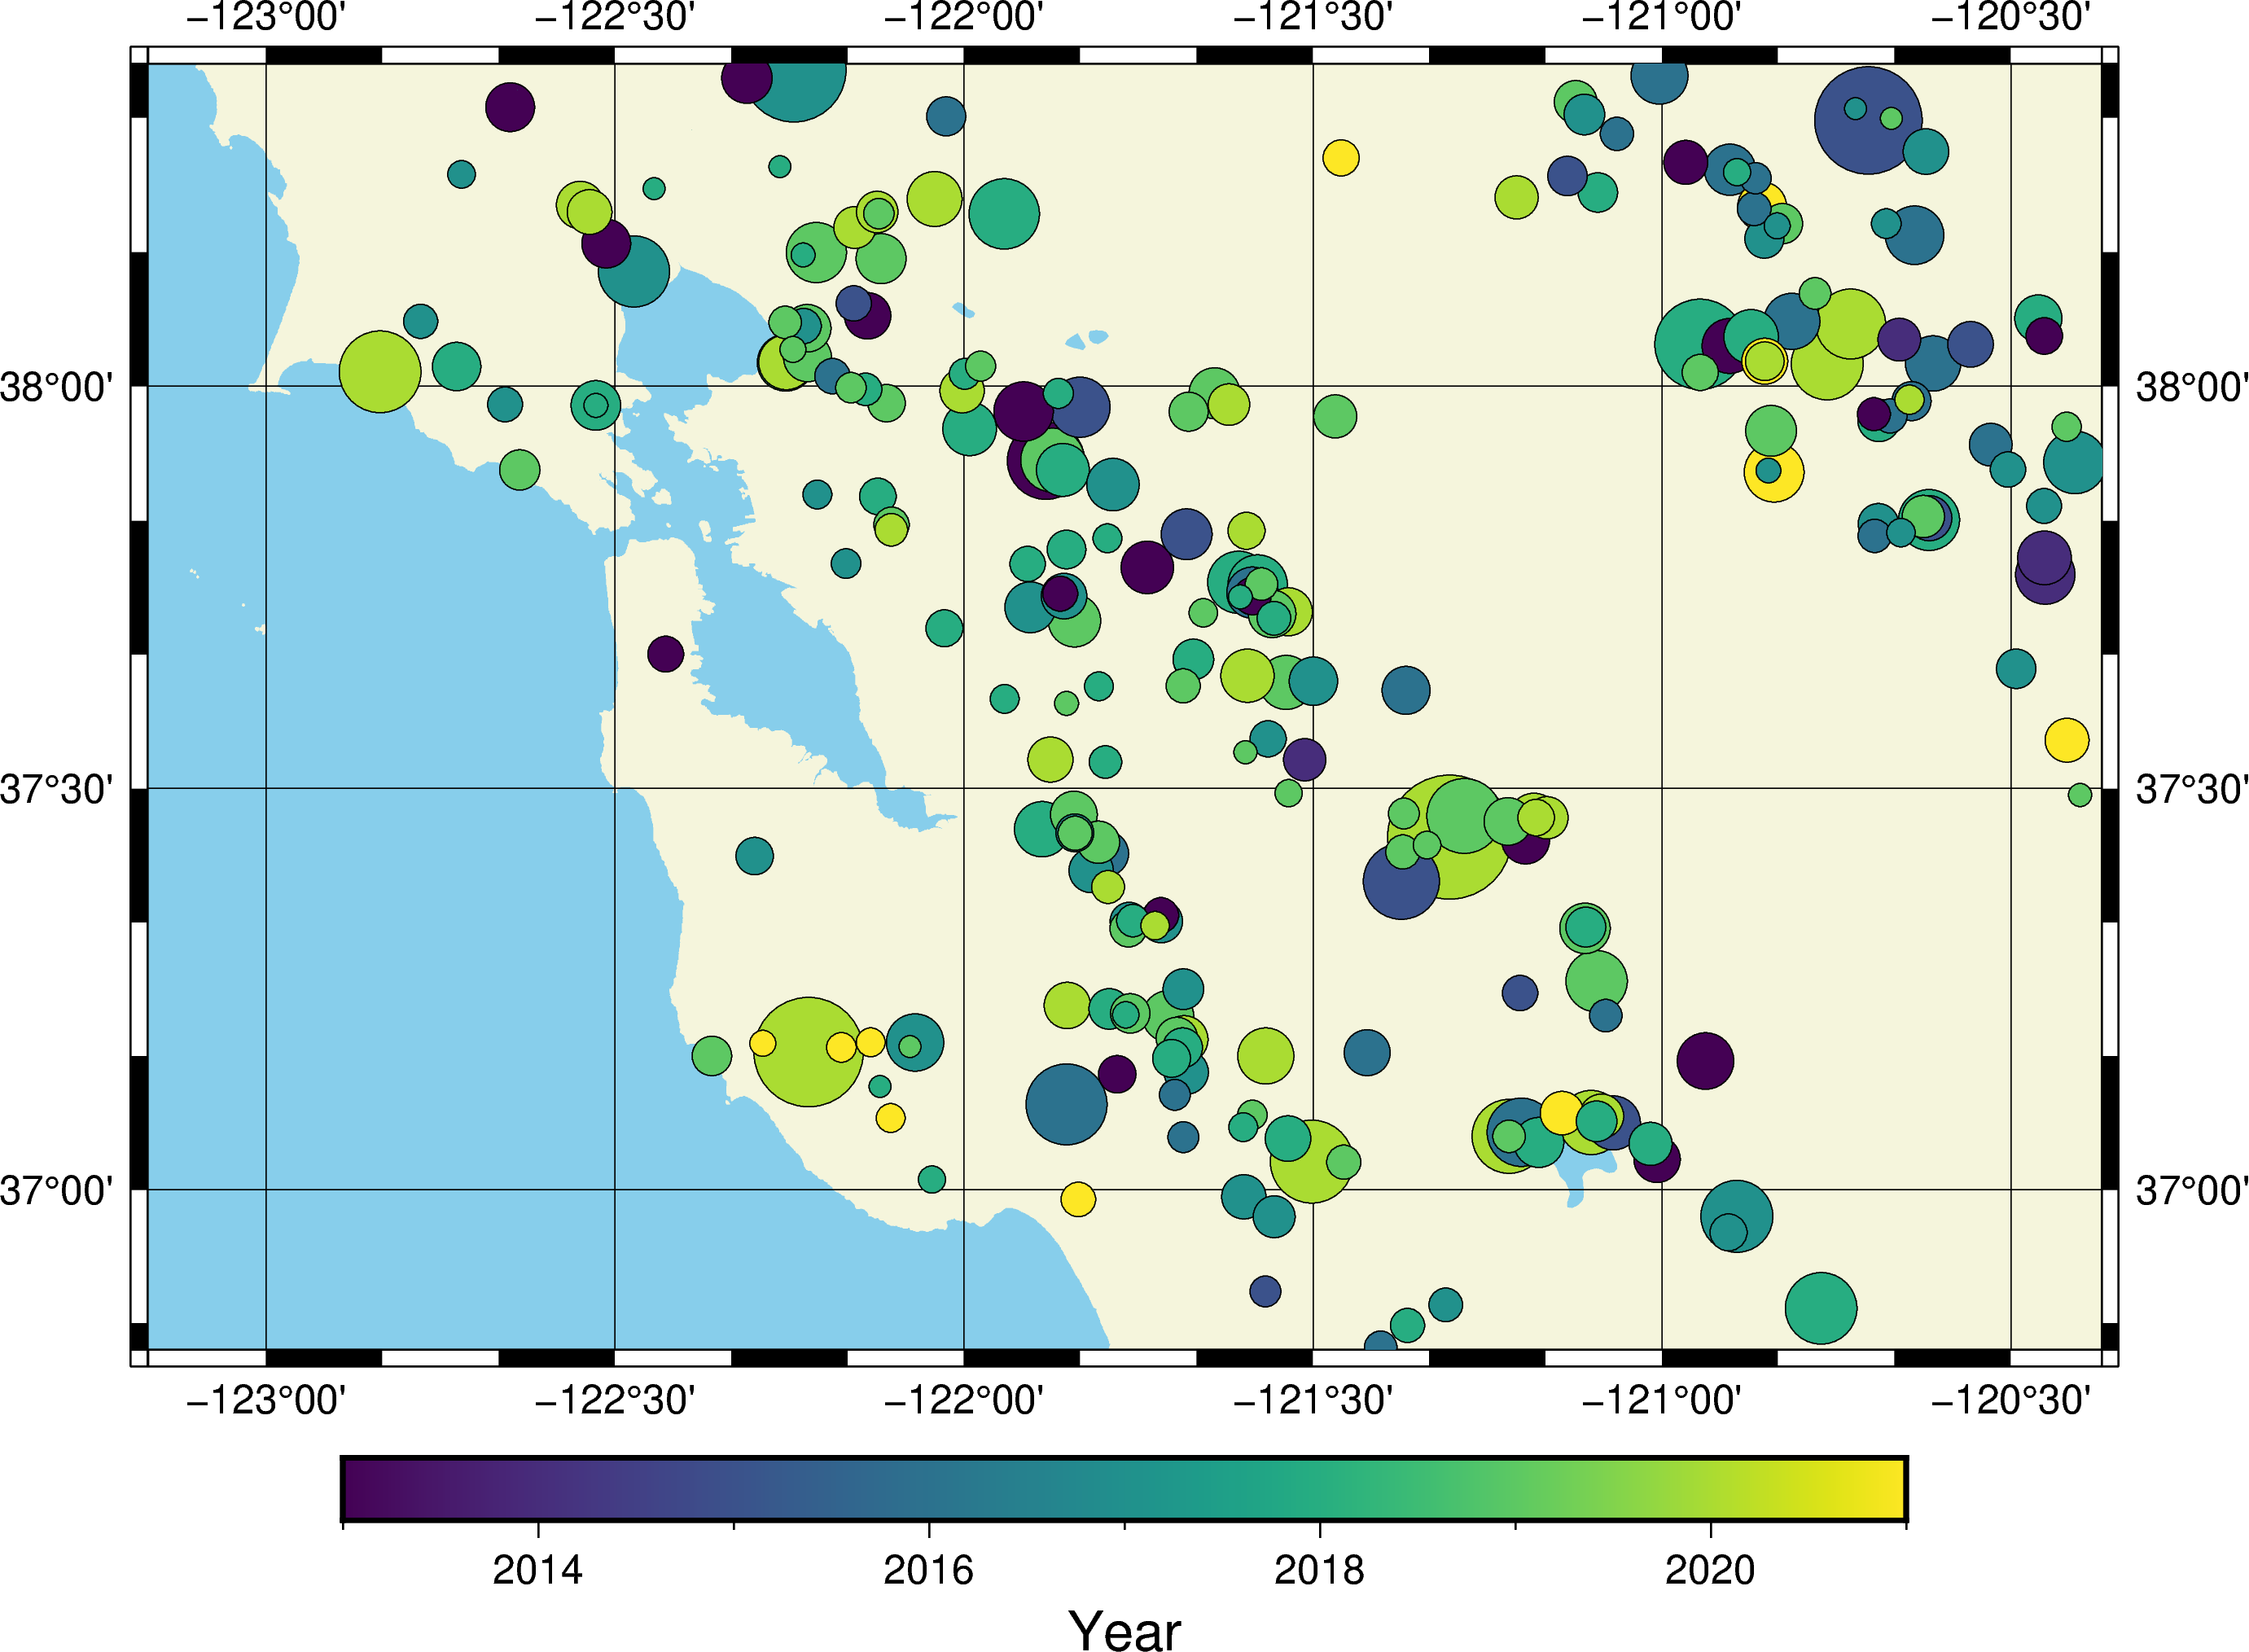

In [38]:
#map the wildfires in the SF region, color by year, and scale by relative size
fig = pygmt.Figure()

fig.coast(region = [sf_lons[0], sf_lons[1], sf_lats[0], sf_lats[1]], frame = "afg", projection = "Cyl_stere/0/-20/8i" , borders = "2/1p,black", land = "beige", water = "skyblue")
pygmt.makecpt(cmap = "viridis", series = [sf_data['Year'].min(), sf_data['Year'].max()])
fig.plot(x = sf_data['Longitude'].values, y = sf_data['Latitude'].values , sizes = .1*np.log(sf_data['AcresBurnedDisplay'].values), color =sf_data['Year'].values, cmap= True, style= "cc", pen = "black")
fig.colorbar(frame = 'af+l"Year"')

fig.show(width =1000)

The CalFire Incident dataset includes the latitude and longitude of each wildfire and the date when it began. For my capstone project, I will examine the conditions in the region where a wildfire occured on the day preceding the wildfire to see if I can predict the severity of the wildfire based on these conditions. Certain conditions may be more conducive to a large wildfire outbreak.

Fire requires oxygen, a fuel source, and heat. <br>

&emsp; Oxygen- oxygen is abundant in the forests.

&emsp; Fuel source- high density urban and wildand forests and forests with more litter from plants, trees, and other dead vegetation would supply wildfires with the greatest fuel. 

&emsp; Heat - During the warm summer season conditions grow arid and hot. <br>

In addition to the warmer surface temperature, California regularly experiences drought. Reduced water vapor in the atmosphere, precipitation, and soil moisture may make the region even more susceptible to wildfires. These conditions would make for an ideal spreading ground, if a wildfire is triggered either by human activity, electrical power lines, lightning strikes, or etc. 



We want to extract the relationship between these physical variables and the number of acres that were burned after a wildfire began, so we'll gather the datasets on the soil moisture, precipitation, land surface temperature, water vapor, and land cover type, on the day preceding each San Francisco wildfire. 

### &emsp; b. Soil Moisture

The soil moisture data comes from NASA's Soil Moisture Active Passive (SMAP) satellite.  SMAP collects data at a 9km x 9km spatial resolution between 85.044$^\circ$N to 85.044$^\circ$S. The satellite began operating  January 2015, so we can recover the soil conditions on the day preceding each wildfire that occured after January 2015. We'll use the [enhanced Level-3 soil moisture product](https://nsidc.org/data/SPL3SMP_E/versions/4) distributed by the National Snow and Ice Data Center to get the soil moisture in the top few c entimeters of the soil.



The file RetrieveData.py contains the functions retrieve and process the soil moisture data. For the implementation details, including how the url is formatted, the http request is sent, the response is received, and the output saved, see the functions in RetrieveData.py. 

The function retrieve_soil_moisture_data() takes a the year, month, day and output file path as inputs then downloads the soil moisture data on that date and stores the result in the outputfile.


In [39]:
import RetrieveData

# create an error log, for files that were not succesfully downloaded
error_log = pd.DataFrame(data=[], columns =["Feature", 'Month', "Day", "Year", "Error"])

In [40]:
#get the soil moisture data
for yyyy, mm, dd in zip(selected_wf['Year'], selected_wf["Month"], selected_wf["Day"]):
    try: 
        RetrieveData.retrieve_soil_moisture_data(str(yyyy),str(mm),str(dd), "Data/")
    except:
        print("File on {}-{}-{} does not exist, continuing to the next file.".format(mm, dd, yyyy))
        
        error_log.loc[len(error_log.index)] = ["Soil_Moisture", mm, dd, yyyy, "File (url) does not exist"] 

Soil_Moisture_8_18_2020.txt already exists
Soil_Moisture_8_16_2020.txt already exists
Soil_Moisture_9_9_2015.txt already exists
Soil_Moisture_10_8_2017.txt already exists
Soil_Moisture_6_29_2018.txt already exists


We can then view the soil moisture conditions on the day preceding the largest wildfire in San Francisco since 2013.

In [41]:
def make_map(lon_data, lat_data, data, cmap="oleron", label= ""):
    SFLats, SFLons = [36.8, 38.4], [-123.17,-120.37]

    maximum = data[~(np.isnan(data))].max()
    
    fig = pygmt.Figure()
    fig.coast(region=[SFLons[0], SFLons[1], SFLats[0], SFLats[1]],frame = "afg", projection =  "Cyl_stere/0/-20/8i", borders = "2/1p,black", land = "beige", water = "skyblue")
    pygmt.makecpt(cmap = cmap, series = [0, maximum])
    fig.plot(x =lon_data.flatten(), y = lat_data.flatten(), color= data.flatten(), cmap= True, style= "c0.2cm", pen = "black")
    fig.colorbar(frame = label)

    return fig

plot [WARNING]: Length <unit> m not supported - revert to default unit [cm]
plot [WARNING]: 0.2c not a valid number and may not be decoded properly.


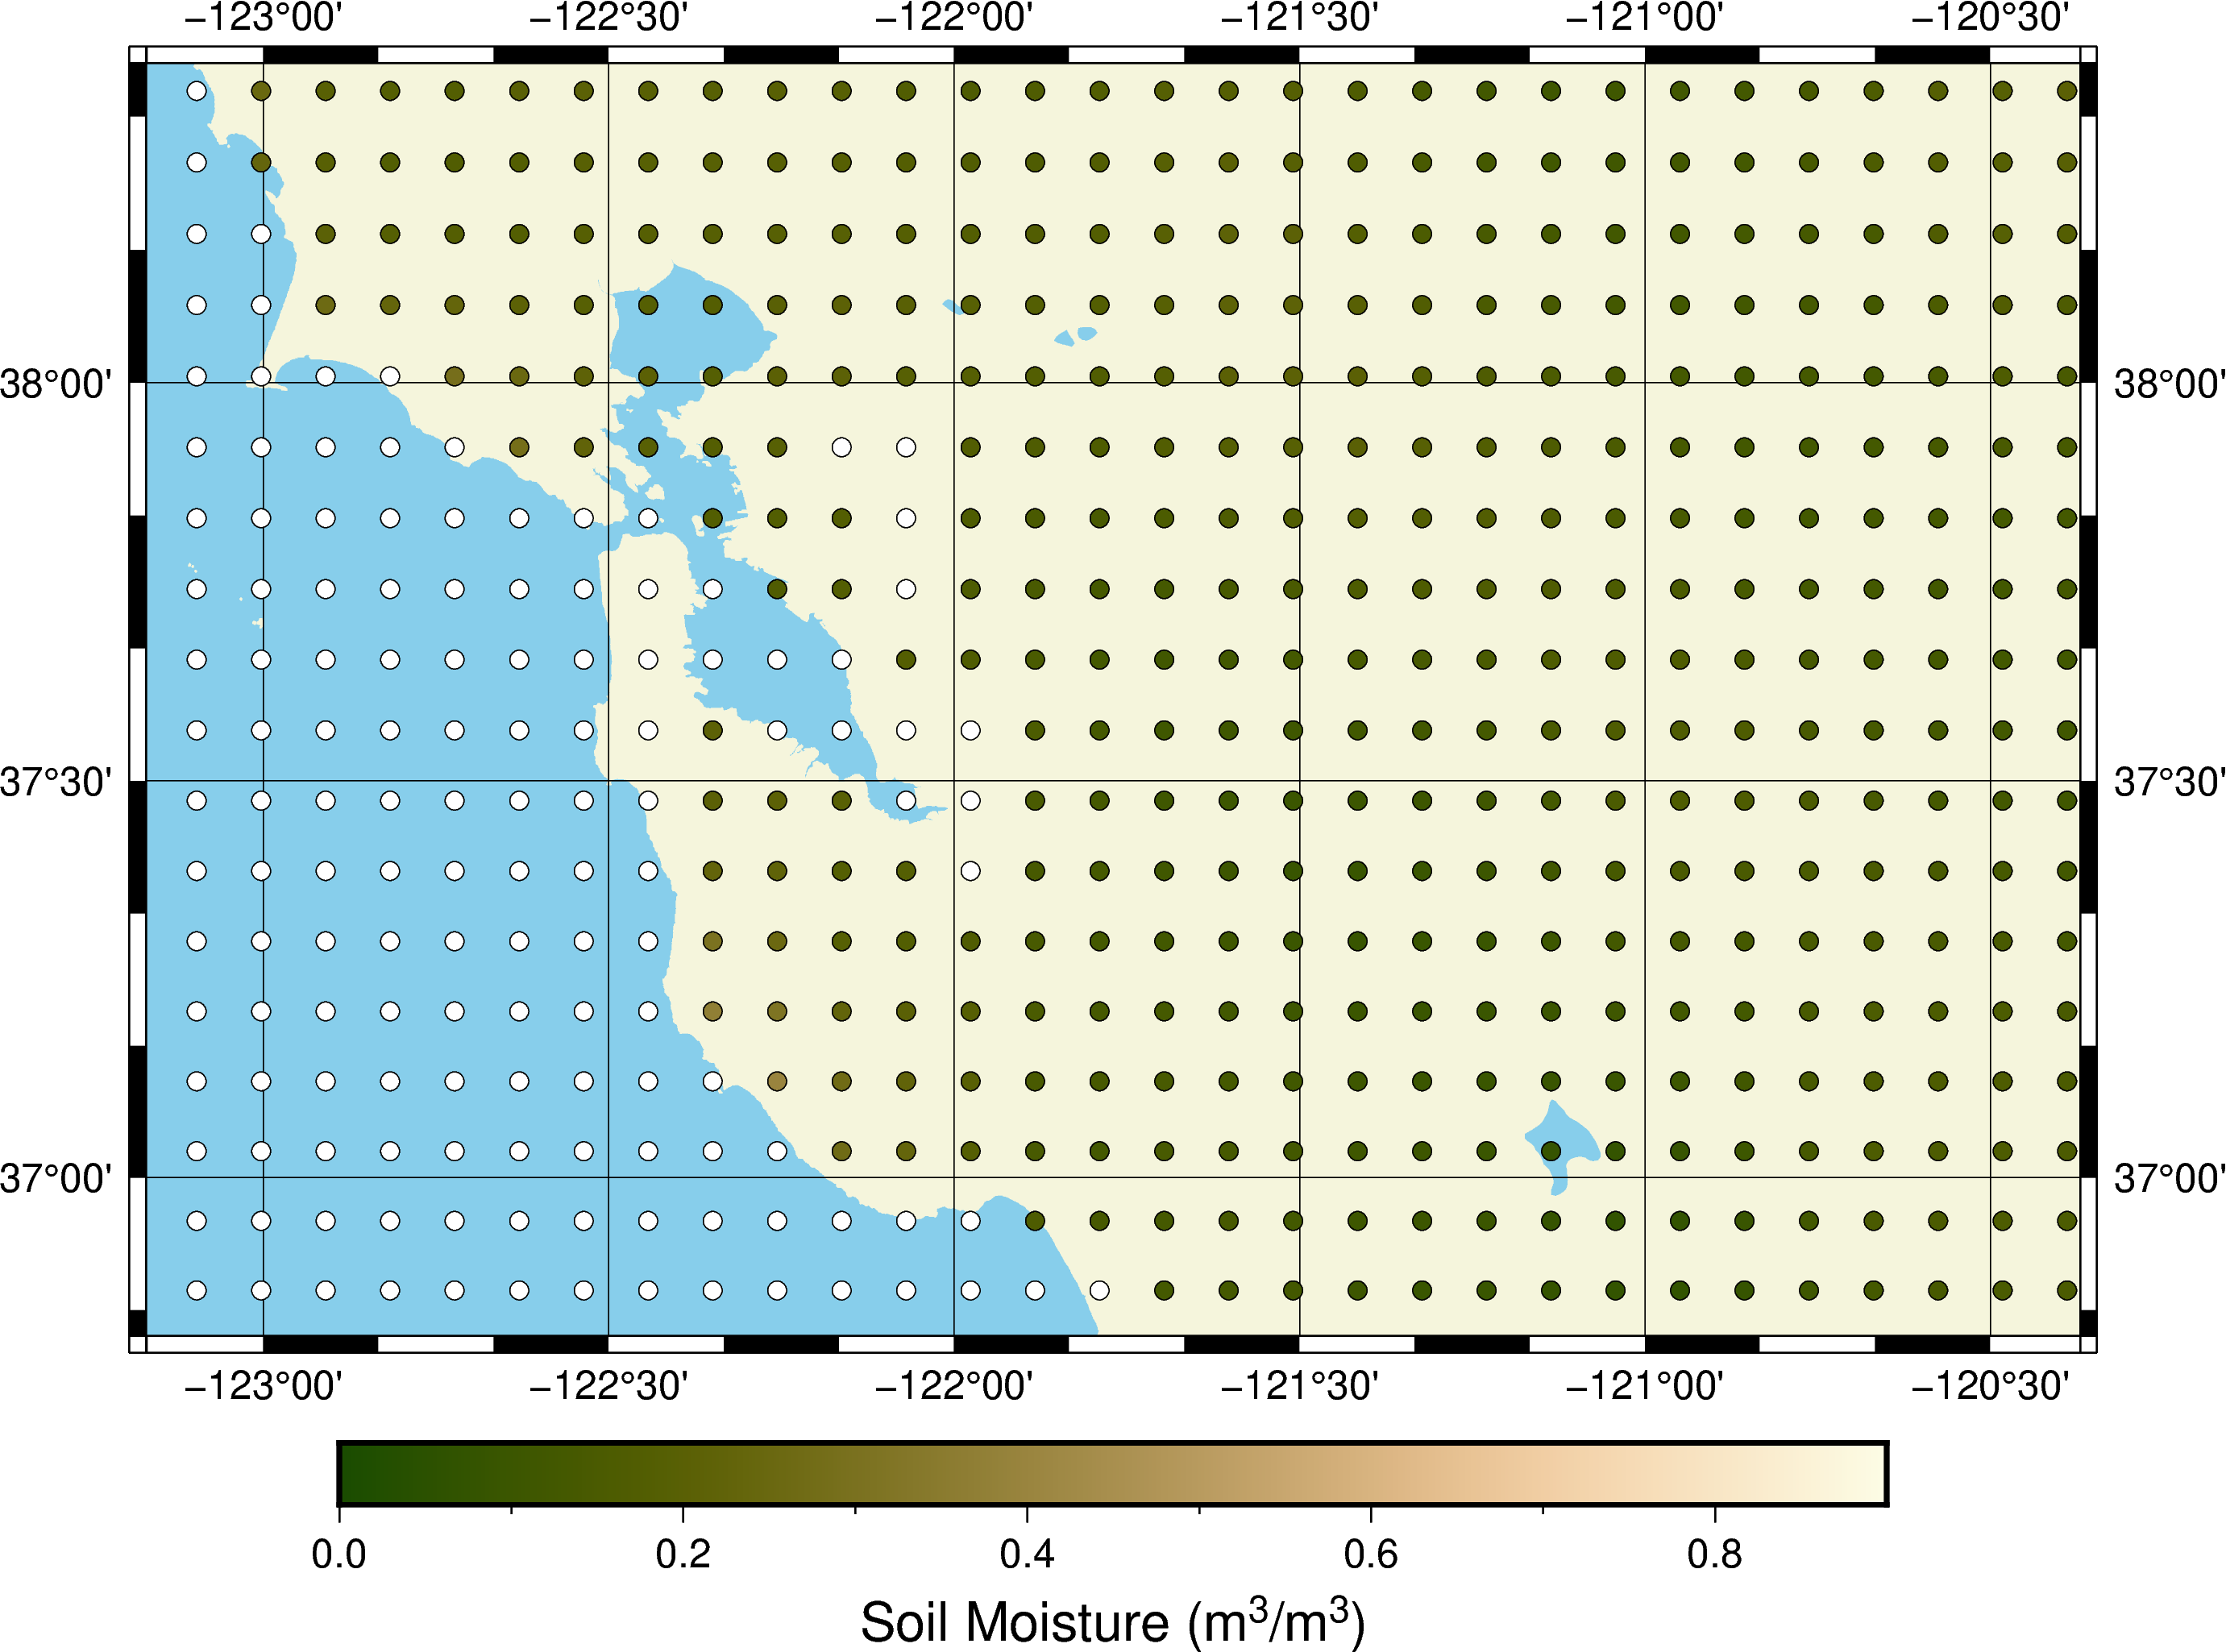

In [42]:
yyyy, mm, dd= selected_wf.iloc[0]["Year"], selected_wf.iloc[0]['Month'], selected_wf.iloc[0]['Day']
lon, lat, sm_data = RetrieveData.extract_soil_data(str(yyyy),str(mm),str(dd), "Data/")

fig= make_map(lon, lat, sm_data, "oleron", 'af+l"Soil Moisture (m@+3@+/m@+3@+)"')
fig.show(width = 1000)

We are only interested in the soil moisture in the immediate region around the wildfire's starting location. So, we can find the nearest soil moisture measurement in the SMAP grid to the starting location of the wildfire. 

In [43]:
# calculate the great circle distance between two points on a map (distance in degrees)
def great_circle(lat_1,lon_1,lat_2,lon_2):
    # lat to co-lat
    colat_1,colat_2=np.radians(90.-lat_1),np.radians(90.-lat_2)
    
    # difference between the longitudes 
    alpha=np.radians(lon_2-lon_1)
    
   
    # from spherical trig:
    cosa=np.cos(colat_1)*np.cos(colat_2)+np.sin(colat_1)*np.sin(colat_2)*np.cos(alpha)
    
    # solve for a
    a=np.arccos(cosa)# take the arc cosine of cosa

    return np.degrees(a) 



def find_nearest_data(yyyy, mm, dd, folder, feature):
    if (feature == "Soil_Moisture"):
        lon, lat, data = RetrieveData.extract_soil_data(yyyy,mm,dd, folder)
    elif (feature == "Precipitation_GPM"):
        lon, lat, data = RetrieveData.extract_precipitation_data(yyyy,mm,dd, folder)
    elif (feature == "Surface_Temperature"):
        lon, lat, data = RetrieveData.extract_surface_temperature_data(yyyy, mm, dd, folder)
    
    
    
    feature_data = pd.DataFrame(data= np.array([lon.flatten(), lat.flatten(), data.flatten()]).transpose(), columns= ["lon", "lat", "data"]).dropna()
    
    # calculate the distance between each data point and the location of the WF    
    current_wf = selected_wf[(selected_wf['Year']==int(yyyy)) & (selected_wf['Month']==int(mm)) & (selected_wf['Day']==int(dd))]
    

    feat_col = feature+"_deg_distance"
    feature_data[feat_col] = great_circle(current_wf['Latitude'].values[0], current_wf['Longitude'].values[0], feature_data['lat'], feature_data['lon'])

    feature_data = feature_data.sort_values(feat_col)
    value = feature_data['data'].values[0]
    deg_distance = feature_data[feat_col].values[0]
    
    lat, lon = feature_data['lat'].values[0], feature_data['lon'].values[0]

    return value, deg_distance, lon, lat


    
def visual_distance_test(yyyy, mm, dd, folder, feature):
    """
    Visual test of the find_nearest_soil_data function
    
    White points = all the soil moisture data for a given day
    Black point = the location of the wildfire on the given day
    Red point = the nearest soil moisture datapoint to the wildfire selected by find_nearest_soil_data()
    
    """
    if (feature == "Soil_Moisture"):
        lon, lat, data = RetrieveData.extract_soil_data(yyyy,mm,dd, folder)
    elif (feature == "Precipitation_GPM"):
        lon, lat, data = RetrieveData.extract_precipitation_data(yyyy,mm,dd, folder)
    elif (feature == "Surface_Temperature"):
        lon, lat, data = RetrieveData.extract_surface_temperature_data(yyyy, mm, dd, folder)
    
    
    value, deg_distance, nearest_lon, nearest_lat = find_nearest_data(str(yyyy), str(mm), str(dd), folder, "Soil_Moisture")
    current_wf = selected_wf[(selected_wf['Year']==int(yyyy)) & (selected_wf['Month']==int(mm)) & (selected_wf['Day']==int(dd))]

    
    fig = pygmt.Figure()
    SFLats, SFLons = [36.8, 38.4], [-123.17,-120.37]
    fig.coast(region = [SFLons[0], SFLons[1], SFLats[0], SFLats[1]], frame = "afg", projection = "Cyl_stere/0/-20/8i" , borders = "2/1p,black", land = "beige", water = "skyblue")

    # plot all the sm data white
    fig.plot(x = lon.flatten(), y = lat.flatten() , color= "white", style= "c0.3m", pen = "black")


    # plot the nearest_data_point - red
    fig.plot(x = nearest_lon, y = nearest_lat, color= "red", style= "c0.3m", pen = "black")


    #plot the location of the wildfire - black
    fig.plot(x =current_wf['Longitude'].values[0] , y =current_wf['Latitude'].values[0] , color= "black", style= "c0.3m", pen = "black")


    fig.colorbar(frame = 'af+l"Soil Moisture"')
    
    return fig

The nearest soil moisture datapoint is 0.040 degrees away at longitude -121.323, latitude 37.475


plot [WARNING]: Length <unit> m not supported - revert to default unit [cm]
plot [WARNING]: Length <unit> m not supported - revert to default unit [cm]
plot [WARNING]: Length <unit> m not supported - revert to default unit [cm]
colorbar [ERROR]: CPT <stdin> has no z-slices!
[Session pygmt-session (110)]: Error returned from GMT API: GMT_CPT_READ_ERROR (8)
[Session pygmt-session (110)]: Error returned from GMT API: GMT_CPT_READ_ERROR (8)


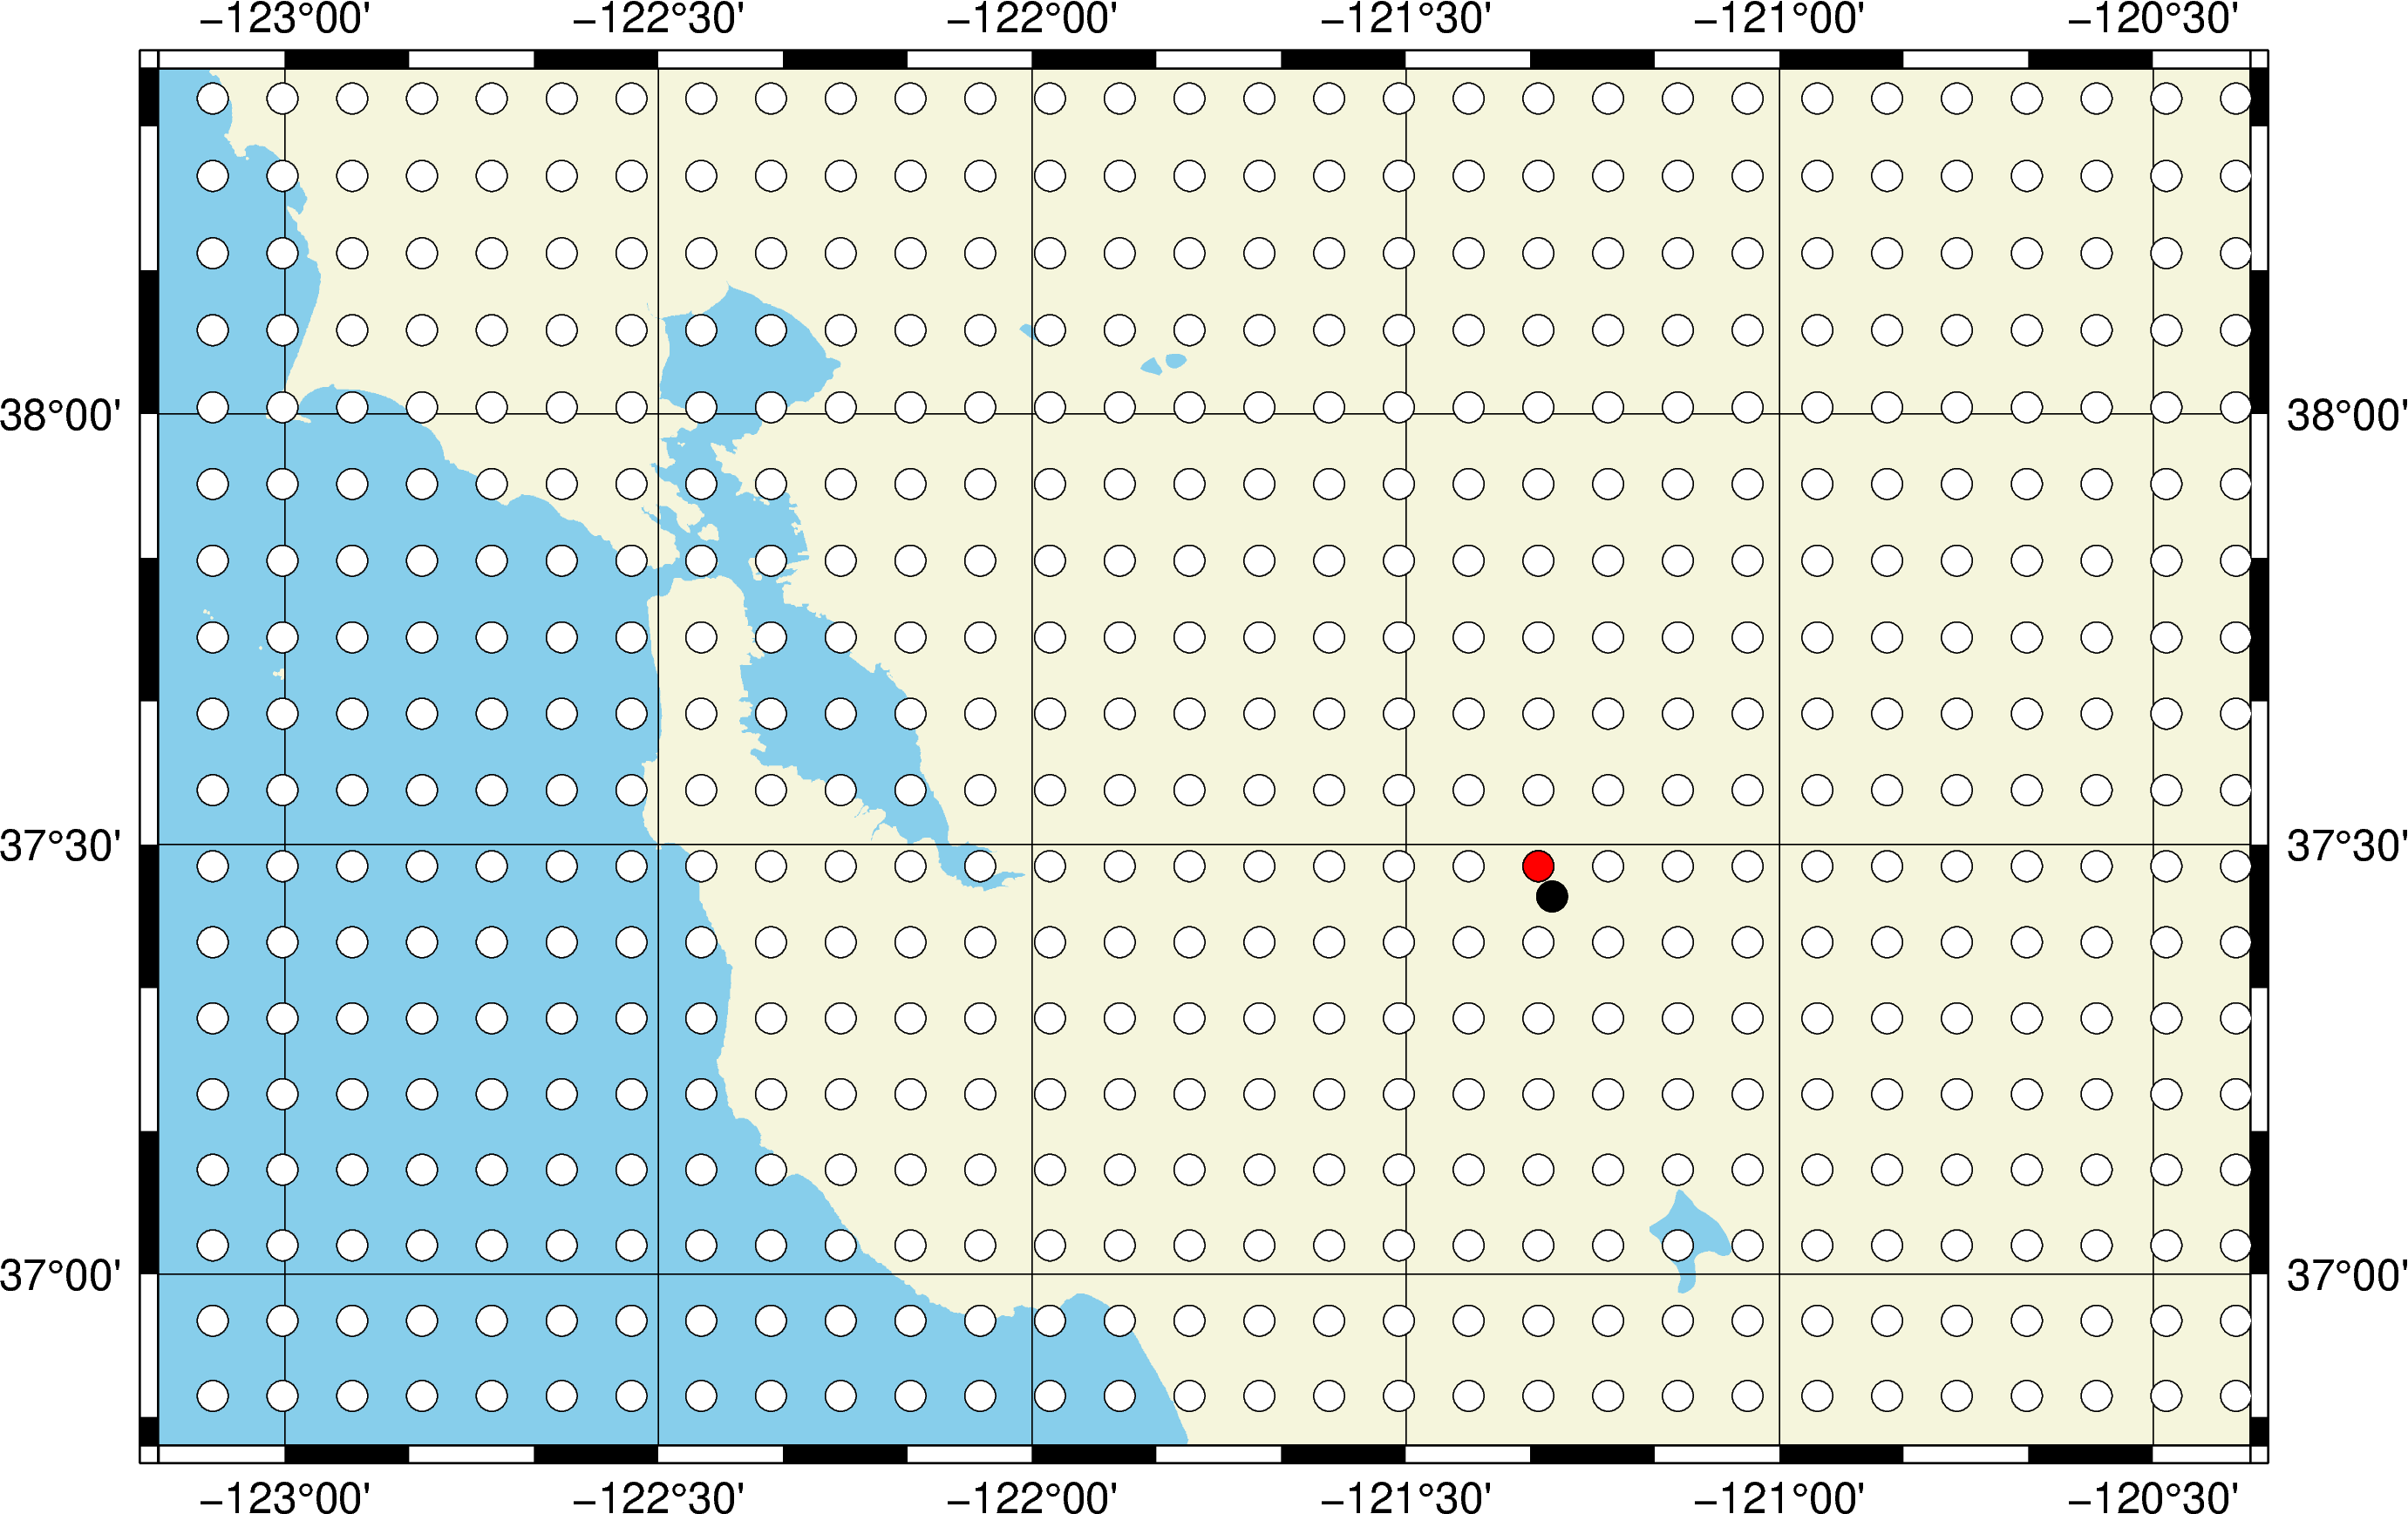

In [44]:
sm, deg_dist,lon, lat =  find_nearest_data(str(yyyy), str(mm), str(dd), "Data/", "Soil_Moisture")
print("The nearest soil moisture datapoint is {:.3f} degrees away at longitude {:.3f}, latitude {:.3f}".format(deg_dist,lon, lat))


fig = visual_distance_test(str(yyyy), str(mm), str(dd), "Data/", "Soil_Moisture")
fig.show(width = 1000)

In [45]:
# find the nearest soil moisture data point to each of the wildfires
find_nearest_data(str(yyyy), str(mm), str(dd), "Data/", "Soil_Moisture")

nearest_data = selected_wf.apply(lambda x: find_nearest_data(str(x['Year']), str(x['Month']), str(x['Day']), "Data/", "Soil_Moisture"), axis = 1, result_type="expand")
selected_wf['Soil_Moisture'], selected_wf['Soil_Moisture_deg_dist']= nearest_data[0], nearest_data[1]

selected_wf

IncidentId                              UniqueId  \
1808        2580  22c6ea3c-304c-4b3b-bfba-7c9dfc63d9da   
1807        2577  d19ac7c7-c899-4600-82c9-fe24dc29f3c9   
409         1066  13466833-32d1-418b-b145-f7ce1f7bf66e   
981         1640  676946dc-1b38-4a09-9bbe-9ce638cfed52   
1154        1812  4efc7855-ecbf-4507-8435-399e23a91fef   

                                                  Name  \
1808                             SCU Lightning Complex   
1807  CZU Lightning Complex (Including Warnella Fire)    
409                                         Butte Fire   
981                  Atlas Fire (Southern LNU Complex)   
1154                                      Waverly Fire   

                                               Location   Latitude  \
1808  Multiple locations throughout Santa Clara Coun...  37.439437   
1807  Various locations across San Mateo and Santa C...  37.171620   
409                                     east of Jackson  38.329740   
981       Off of Altas Peak Rd, south of Lake Berryessa  38.392060   
1154  off North Waverly Road and North Shelton Road,...  38.052055   

       Longitude  AcresBurnedDisplay PercentContainedDisplay  \
1808 -121.304350            396624.0                    100%   
1807 -122.222750             86509.0                    100%   
409  -120.704180             70868.0                    100%   
981  -122.243670             51624.0                    100%   
1154 -120.945482             12300.0                    100%   

                                           CountiesList          UpdatedDate  \
1808  Santa Clara, Alameda, Contra Costa, San Joaqui...  2020-10-01 10:29:40   
1807                              Santa Cruz, San Mateo  2020-09-23 15:43:36   
409                                                 NaN  2015-10-15 19:45:00   
981                                        Napa, Solano  2019-10-25 08:47:30   
1154                                        San Joaquin  2019-10-25 09:32:06   

      ...                                          AdminUnit  \
1808  ...                          CAL FIRE Santa Clara Unit   
1807  ...  Unified Command Agencies: Santa Cruz Co. Sheri...   
409   ...                   CAL FIRE Amador - El Dorado Unit   
981   ...                     CAL FIRE Sonoma-Lake-Napa Unit   
1154  ...                   CAL FIRE Tuolumne-Calaveras Unit   

     IncidentTypeDisplay                                                Url  \
1808            Wildfire  https://www.fire.ca.gov/incidents/2020/8/18/sc...   
1807            Wildfire  https://www.fire.ca.gov/incidents/2020/8/16/cz...   
409                  NaN  https://www.fire.ca.gov/incidents/2015/9/9/but...   
981             Wildfire  https://www.fire.ca.gov/incidents/2017/10/8/at...   
1154            Wildfire  https://www.fire.ca.gov/incidents/2018/6/29/wa...   

     IsActive                Cause  Year  Month  Day  Soil_Moisture  \
1808        N              Unknown  2020      8   18       0.105231   
1807        N            Lightning  2020      8   16       0.236015   
409         N          Power Lines  2015      9    9       0.031756   
981         N  Under Investigation  2017     10    8       0.198719   
1154        N              Unknown  2018      6   29       0.109848   

      Soil_Moisture_deg_dist  
1808                0.039565  
1807                0.048457  
409                10.305342  
981                 0.027976  
1154                0.039565  

[5 rows x 21 columns]

### &emsp; c. Precipitation

The precipitation data comes from a constellation of satellites that comprise the Global Precipitation Measurement Mission. The measurements collected by the satellites are combined to produce a multi-satellite precipitation product, that quantifies the daily accumulated precipitation (mm) [Integrated Multi-satellitE Retrievels for GPM (IMERG)](https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGDL_06/summary).The precipitation product provides global coverage (-90$^\circ$ to 90$^\circ$) at a .1$^\circ$ x .1$^\circ$ spatial resolution. The data is distributed by the [Goddard Earth Sciences Data and Information Services Center (GES DISC)](https://earthdata.nasa.gov/eosdis/daacs/gesdisc). 

The file RetreiveData.py includes several functions to download, extract, visualize these precipitation datasets. 

In [46]:
# get the precipitation data
for yyyy, mm, dd in zip(selected_wf['Year'], selected_wf["Month"], selected_wf["Day"]):
    try: 
        RetrieveData.retrieve_precipitation_data(str(yyyy),str(mm),str(dd), "Data/")
    except:
        print("File on {}-{}-{} does not exist, continuing to the next file.".format(mm, dd, yyyy))
        error_log.loc[len(error_log.index)] = ["Precipitation", mm, dd, yyyy, "File (url) does not exist"] 

Precipitation_GPM_08_18_2020.nc4 already exists
Precipitation_GPM_08_16_2020.nc4 already exists
Precipitation_GPM_09_09_2015.nc4 already exists
Precipitation_GPM_10_08_2017.nc4 already exists
Precipitation_GPM_06_29_2018.nc4 already exists


plot [WARNING]: Length <unit> m not supported - revert to default unit [cm]
plot [WARNING]: 0.2c not a valid number and may not be decoded properly.


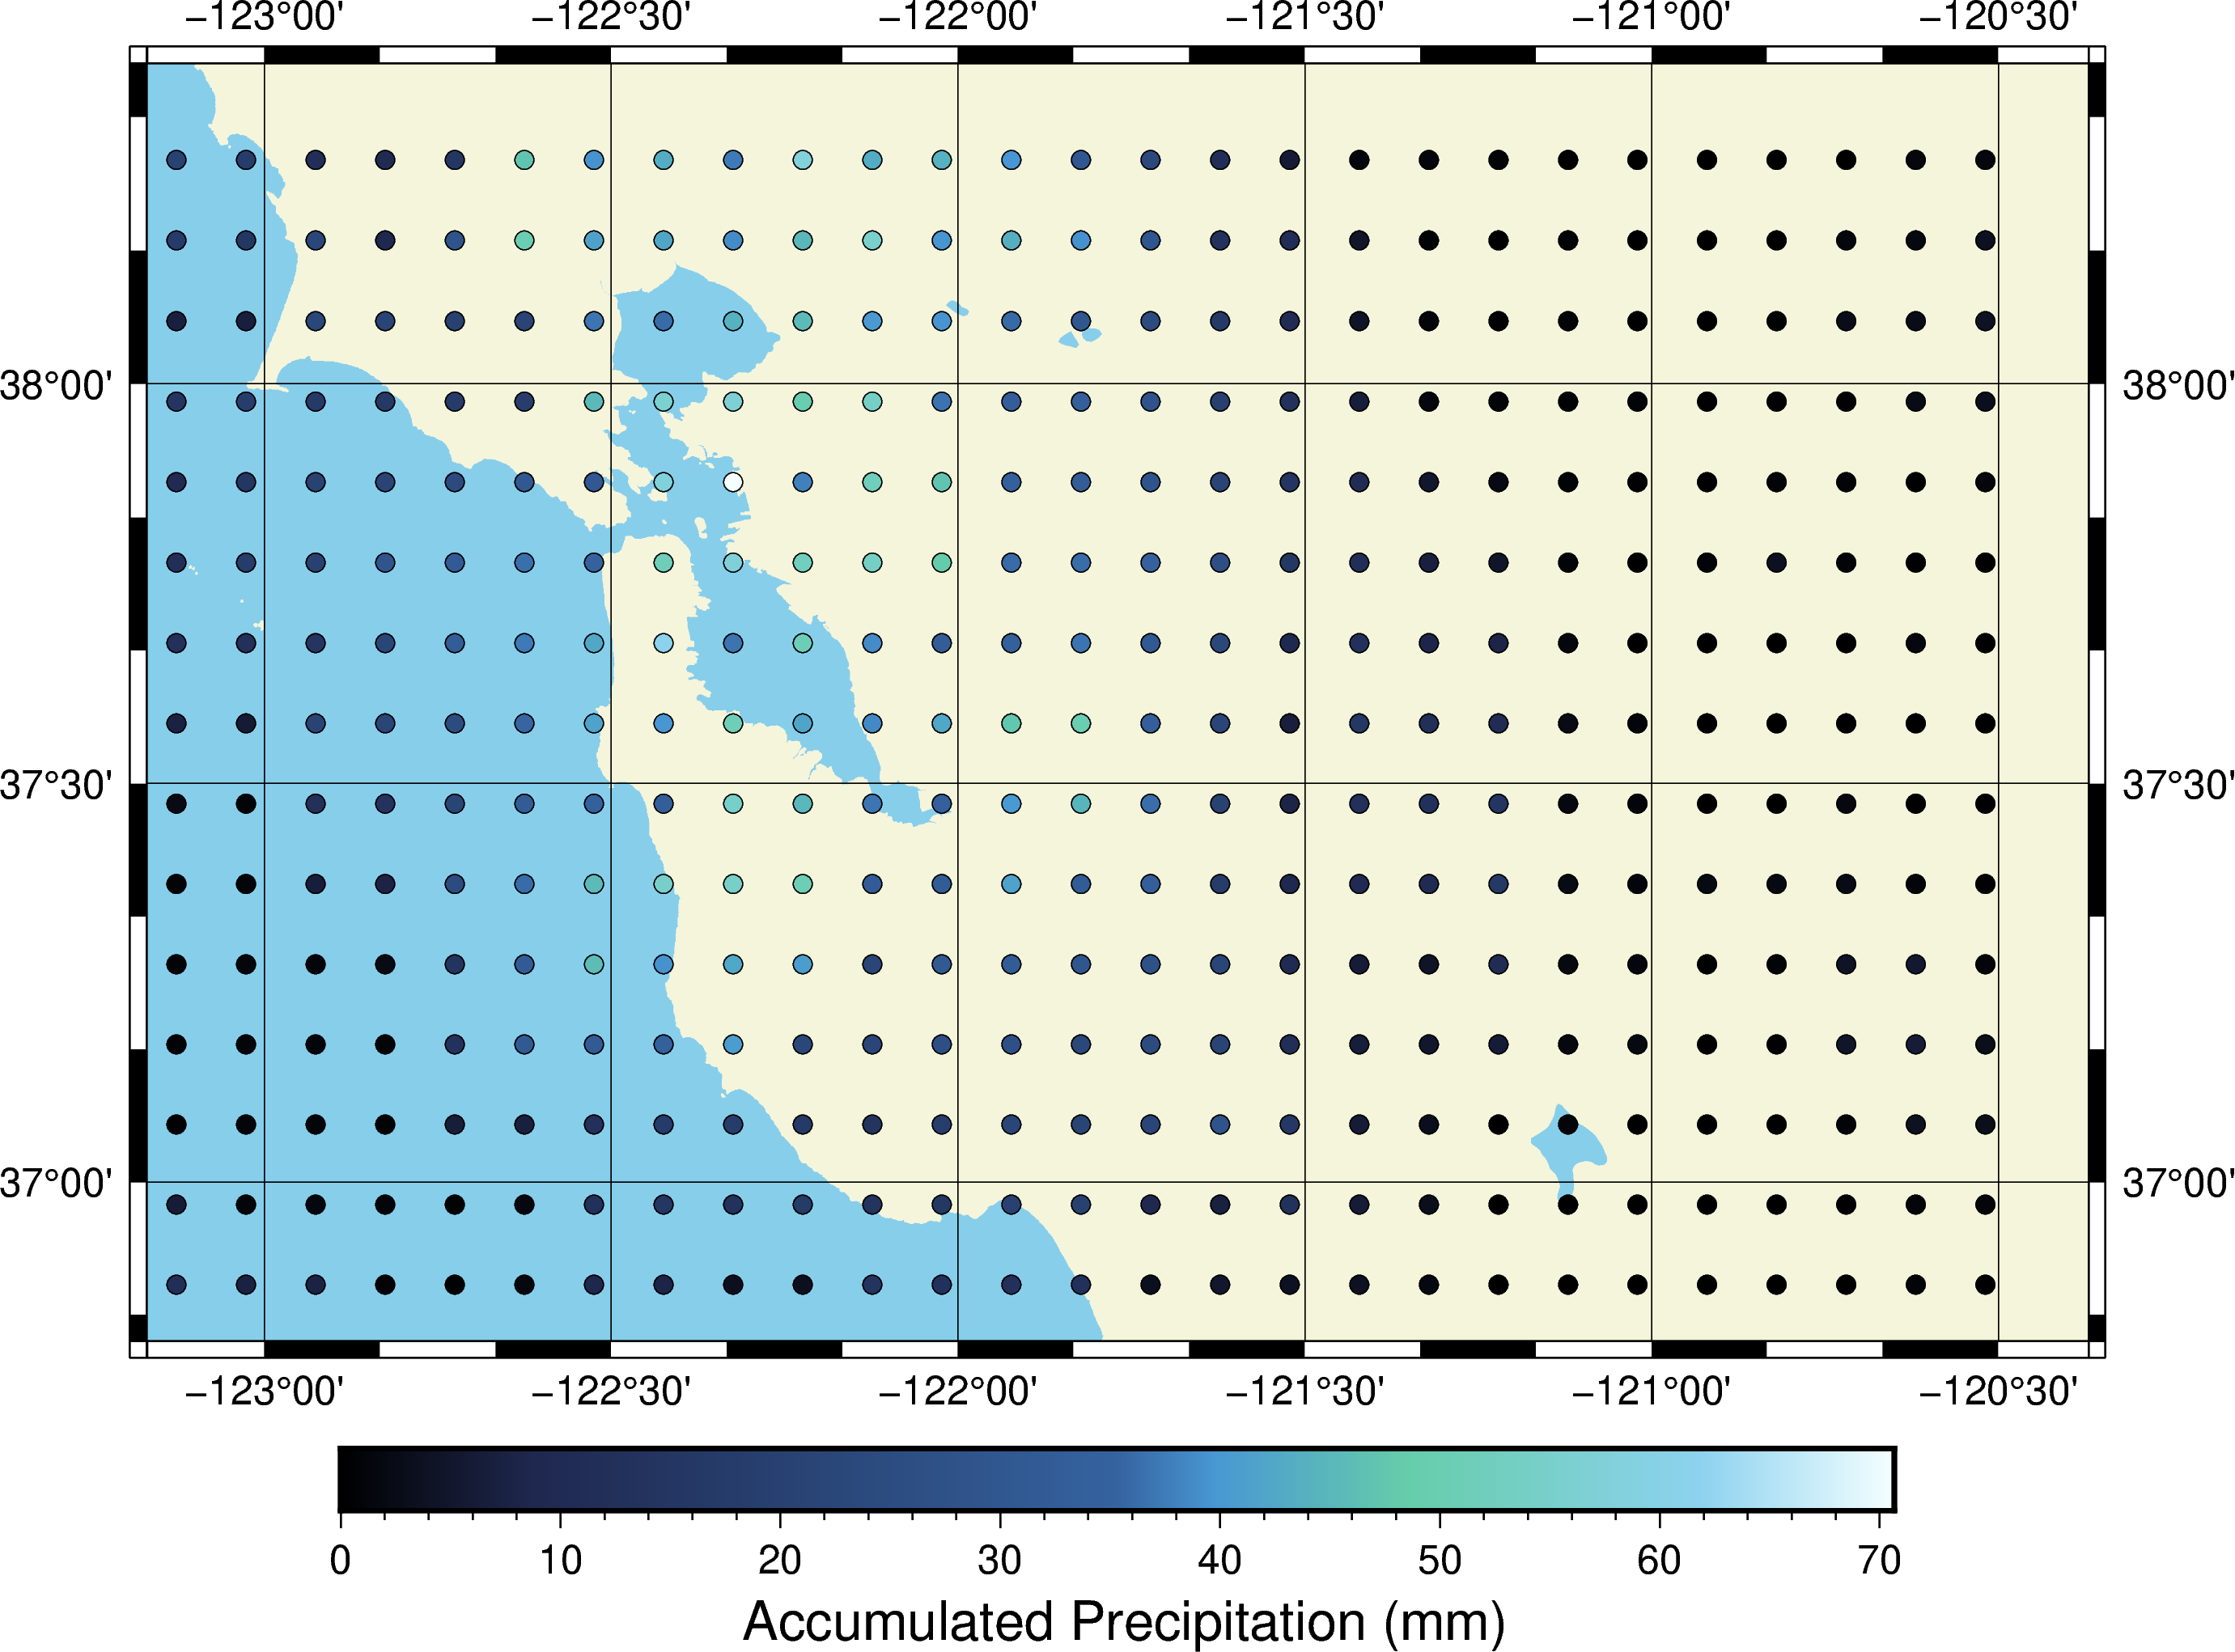

In [47]:
#map the data
yyyy, mm, dd= selected_wf.iloc[1]["Year"], selected_wf.iloc[1]['Month'], selected_wf.iloc[1]['Day']
lon, lat, precip_data = RetrieveData.extract_precipitation_data(str(yyyy),str(mm),str(dd), "Data/")

fig= make_map(lon, lat, precip_data, "bathy", 'af+l" Accumulated Precipitation (mm)"')
fig.show(width = 1000)

The nearest precipitation datapoint is 0.002 degrees away at longitude -122.224, latitude 37.173


plot [WARNING]: Length <unit> m not supported - revert to default unit [cm]
plot [WARNING]: Length <unit> m not supported - revert to default unit [cm]
plot [WARNING]: Length <unit> m not supported - revert to default unit [cm]
colorbar [ERROR]: CPT <stdin> has no z-slices!
[Session pygmt-session (133)]: Error returned from GMT API: GMT_CPT_READ_ERROR (8)
[Session pygmt-session (133)]: Error returned from GMT API: GMT_CPT_READ_ERROR (8)


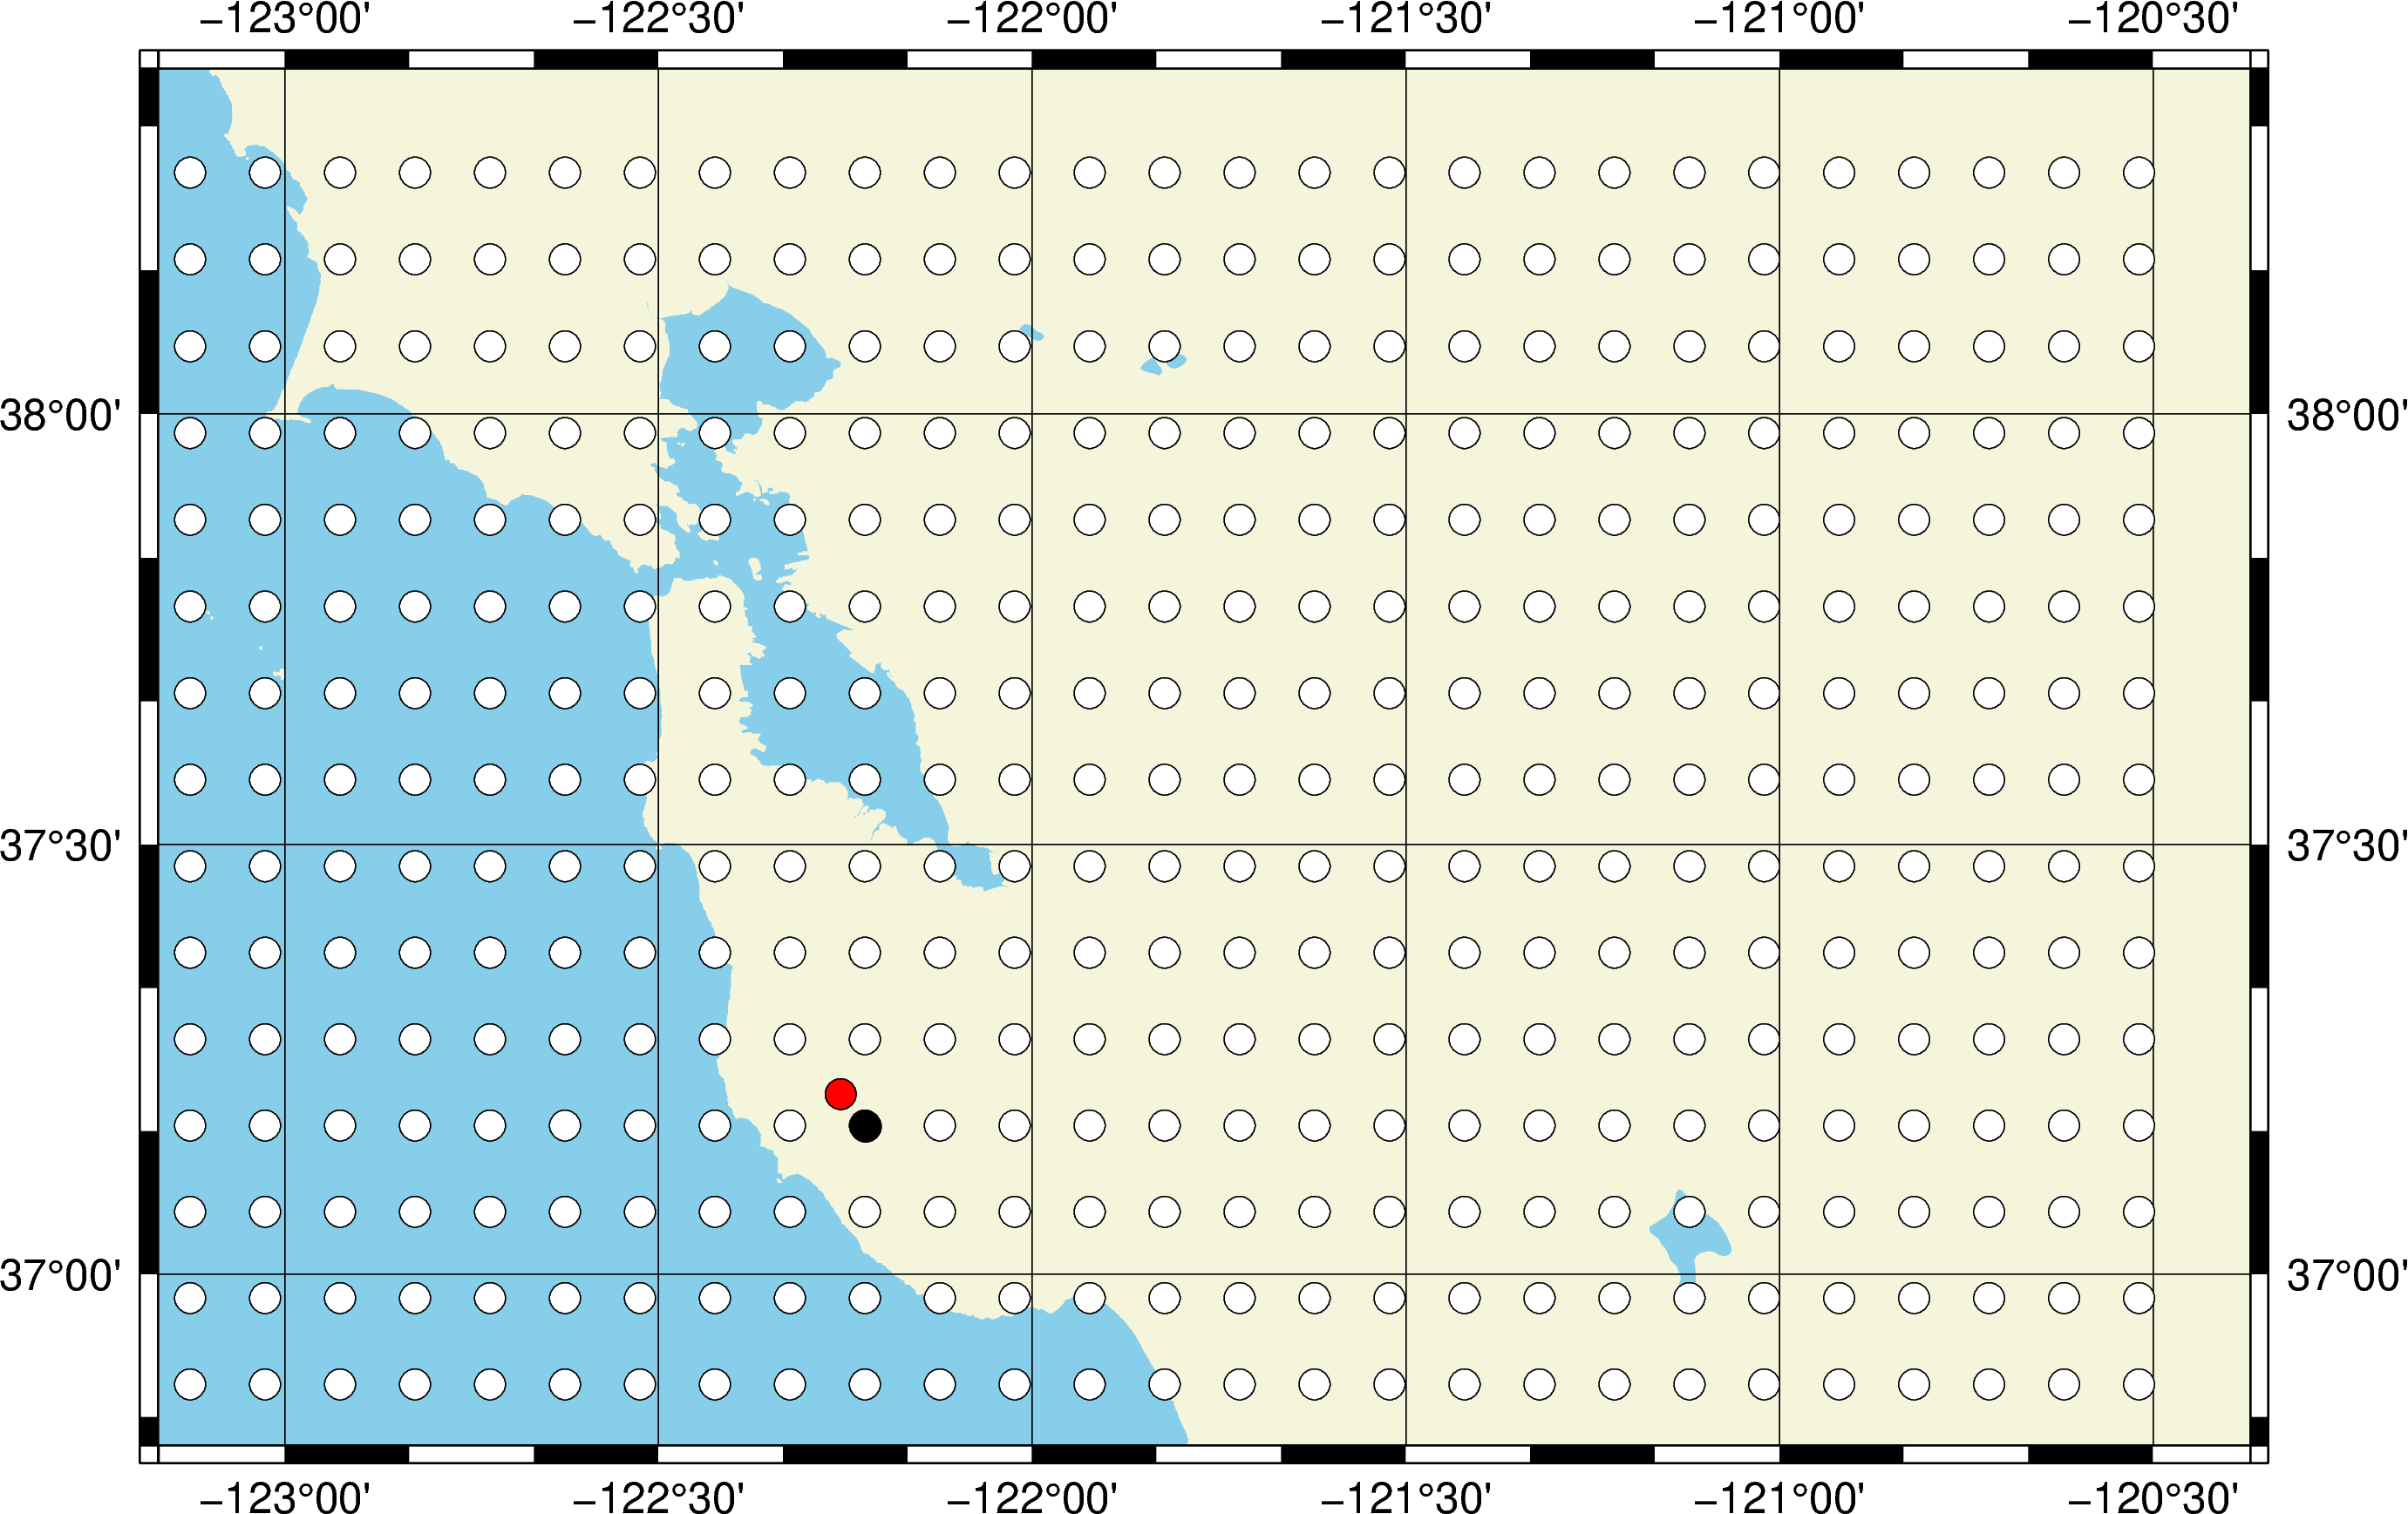

In [48]:
# find the nearest precipitation datapoint, test visually 
precip, deg_dist,lon, lat =  find_nearest_data(str(yyyy), str(mm), str(dd), "Data/", "Precipitation_GPM")
print("The nearest precipitation datapoint is {:.3f} degrees away at longitude {:.3f}, latitude {:.3f}".format(deg_dist,lon, lat))


fig = visual_distance_test(str(yyyy), str(mm), str(dd), "Data/", "Precipitation_GPM")
fig.show(width = 1000)

In [49]:
#find the nearest data point to every wildfire
find_nearest_data(str(yyyy), str(mm), str(dd), "Data/", "Precipitation_GPM")

nearest_data = selected_wf.apply(lambda x: find_nearest_data(str(x['Year']), str(x['Month']), str(x['Day']), "Data/", "Soil_Moisture"), axis = 1, result_type="expand")
selected_wf['Precipitation_GPM'], selected_wf['Precipitation_deg_dist']= nearest_data[0], nearest_data[1]

selected_wf

IncidentId                              UniqueId  \
1808        2580  22c6ea3c-304c-4b3b-bfba-7c9dfc63d9da   
1807        2577  d19ac7c7-c899-4600-82c9-fe24dc29f3c9   
409         1066  13466833-32d1-418b-b145-f7ce1f7bf66e   
981         1640  676946dc-1b38-4a09-9bbe-9ce638cfed52   
1154        1812  4efc7855-ecbf-4507-8435-399e23a91fef   

                                                  Name  \
1808                             SCU Lightning Complex   
1807  CZU Lightning Complex (Including Warnella Fire)    
409                                         Butte Fire   
981                  Atlas Fire (Southern LNU Complex)   
1154                                      Waverly Fire   

                                               Location   Latitude  \
1808  Multiple locations throughout Santa Clara Coun...  37.439437   
1807  Various locations across San Mateo and Santa C...  37.171620   
409                                     east of Jackson  38.329740   
981       Off of Altas Peak Rd, south of Lake Berryessa  38.392060   
1154  off North Waverly Road and North Shelton Road,...  38.052055   

       Longitude  AcresBurnedDisplay PercentContainedDisplay  \
1808 -121.304350            396624.0                    100%   
1807 -122.222750             86509.0                    100%   
409  -120.704180             70868.0                    100%   
981  -122.243670             51624.0                    100%   
1154 -120.945482             12300.0                    100%   

                                           CountiesList          UpdatedDate  \
1808  Santa Clara, Alameda, Contra Costa, San Joaqui...  2020-10-01 10:29:40   
1807                              Santa Cruz, San Mateo  2020-09-23 15:43:36   
409                                                 NaN  2015-10-15 19:45:00   
981                                        Napa, Solano  2019-10-25 08:47:30   
1154                                        San Joaquin  2019-10-25 09:32:06   

      ...                                                Url IsActive  \
1808  ...  https://www.fire.ca.gov/incidents/2020/8/18/sc...        N   
1807  ...  https://www.fire.ca.gov/incidents/2020/8/16/cz...        N   
409   ...  https://www.fire.ca.gov/incidents/2015/9/9/but...        N   
981   ...  https://www.fire.ca.gov/incidents/2017/10/8/at...        N   
1154  ...  https://www.fire.ca.gov/incidents/2018/6/29/wa...        N   

                    Cause  Year Month Day  Soil_Moisture  \
1808              Unknown  2020     8  18       0.105231   
1807            Lightning  2020     8  16       0.236015   
409           Power Lines  2015     9   9       0.031756   
981   Under Investigation  2017    10   8       0.198719   
1154              Unknown  2018     6  29       0.109848   

      Soil_Moisture_deg_dist  Precipitation_GPM  Precipitation_deg_dist  
1808                0.039565           0.105231                0.039565  
1807                0.048457           0.236015                0.048457  
409                10.305342           0.031756               10.305342  
981                 0.027976           0.198719                0.027976  
1154                0.039565           0.109848                0.039565  

[5 rows x 23 columns]

### &emsp; d. Surface Temperature

The surface temperature data comes from the Moderate Resolution Imaging Spectroradiometer (MODIS) aboard NASA's satellite Terra. The dataset provides global coverage at a 1 km spatial resolution beginning from December 1999. We'll use the Daily Land Surface/Emissivity data product that is distributed by the [Land Processes Distributed Active Archive Center](https://lpdaac.usgs.gov/).

In [50]:
# get the surface temperature data
for yyyy, mm, dd in zip(selected_wf['Year'], selected_wf["Month"], selected_wf["Day"]):
    try:
        RetrieveData.retrieve_surface_temperature_data(str(yyyy),str(mm),str(dd), "Data/")
    except:
        print("File on {}-{}-{} does not exist, continuing to the next file.".format(mm, dd, yyyy))
        
        error_log.loc[len(error_log.index)] = ["Surface_Temperature", mm, dd, yyyy, "File (url) does not exist"] 


Surface_Temperature_8_18_2020.hdf already exists
Surface_Temperature_8_16_2020.hdf already exists
Surface_Temperature_9_9_2015.hdf already exists
Surface_Temperature_10_8_2017.hdf already exists
Surface_Temperature_6_29_2018.hdf already exists


plot [WARNING]: Length <unit> m not supported - revert to default unit [cm]
plot [WARNING]: 0.2c not a valid number and may not be decoded properly.


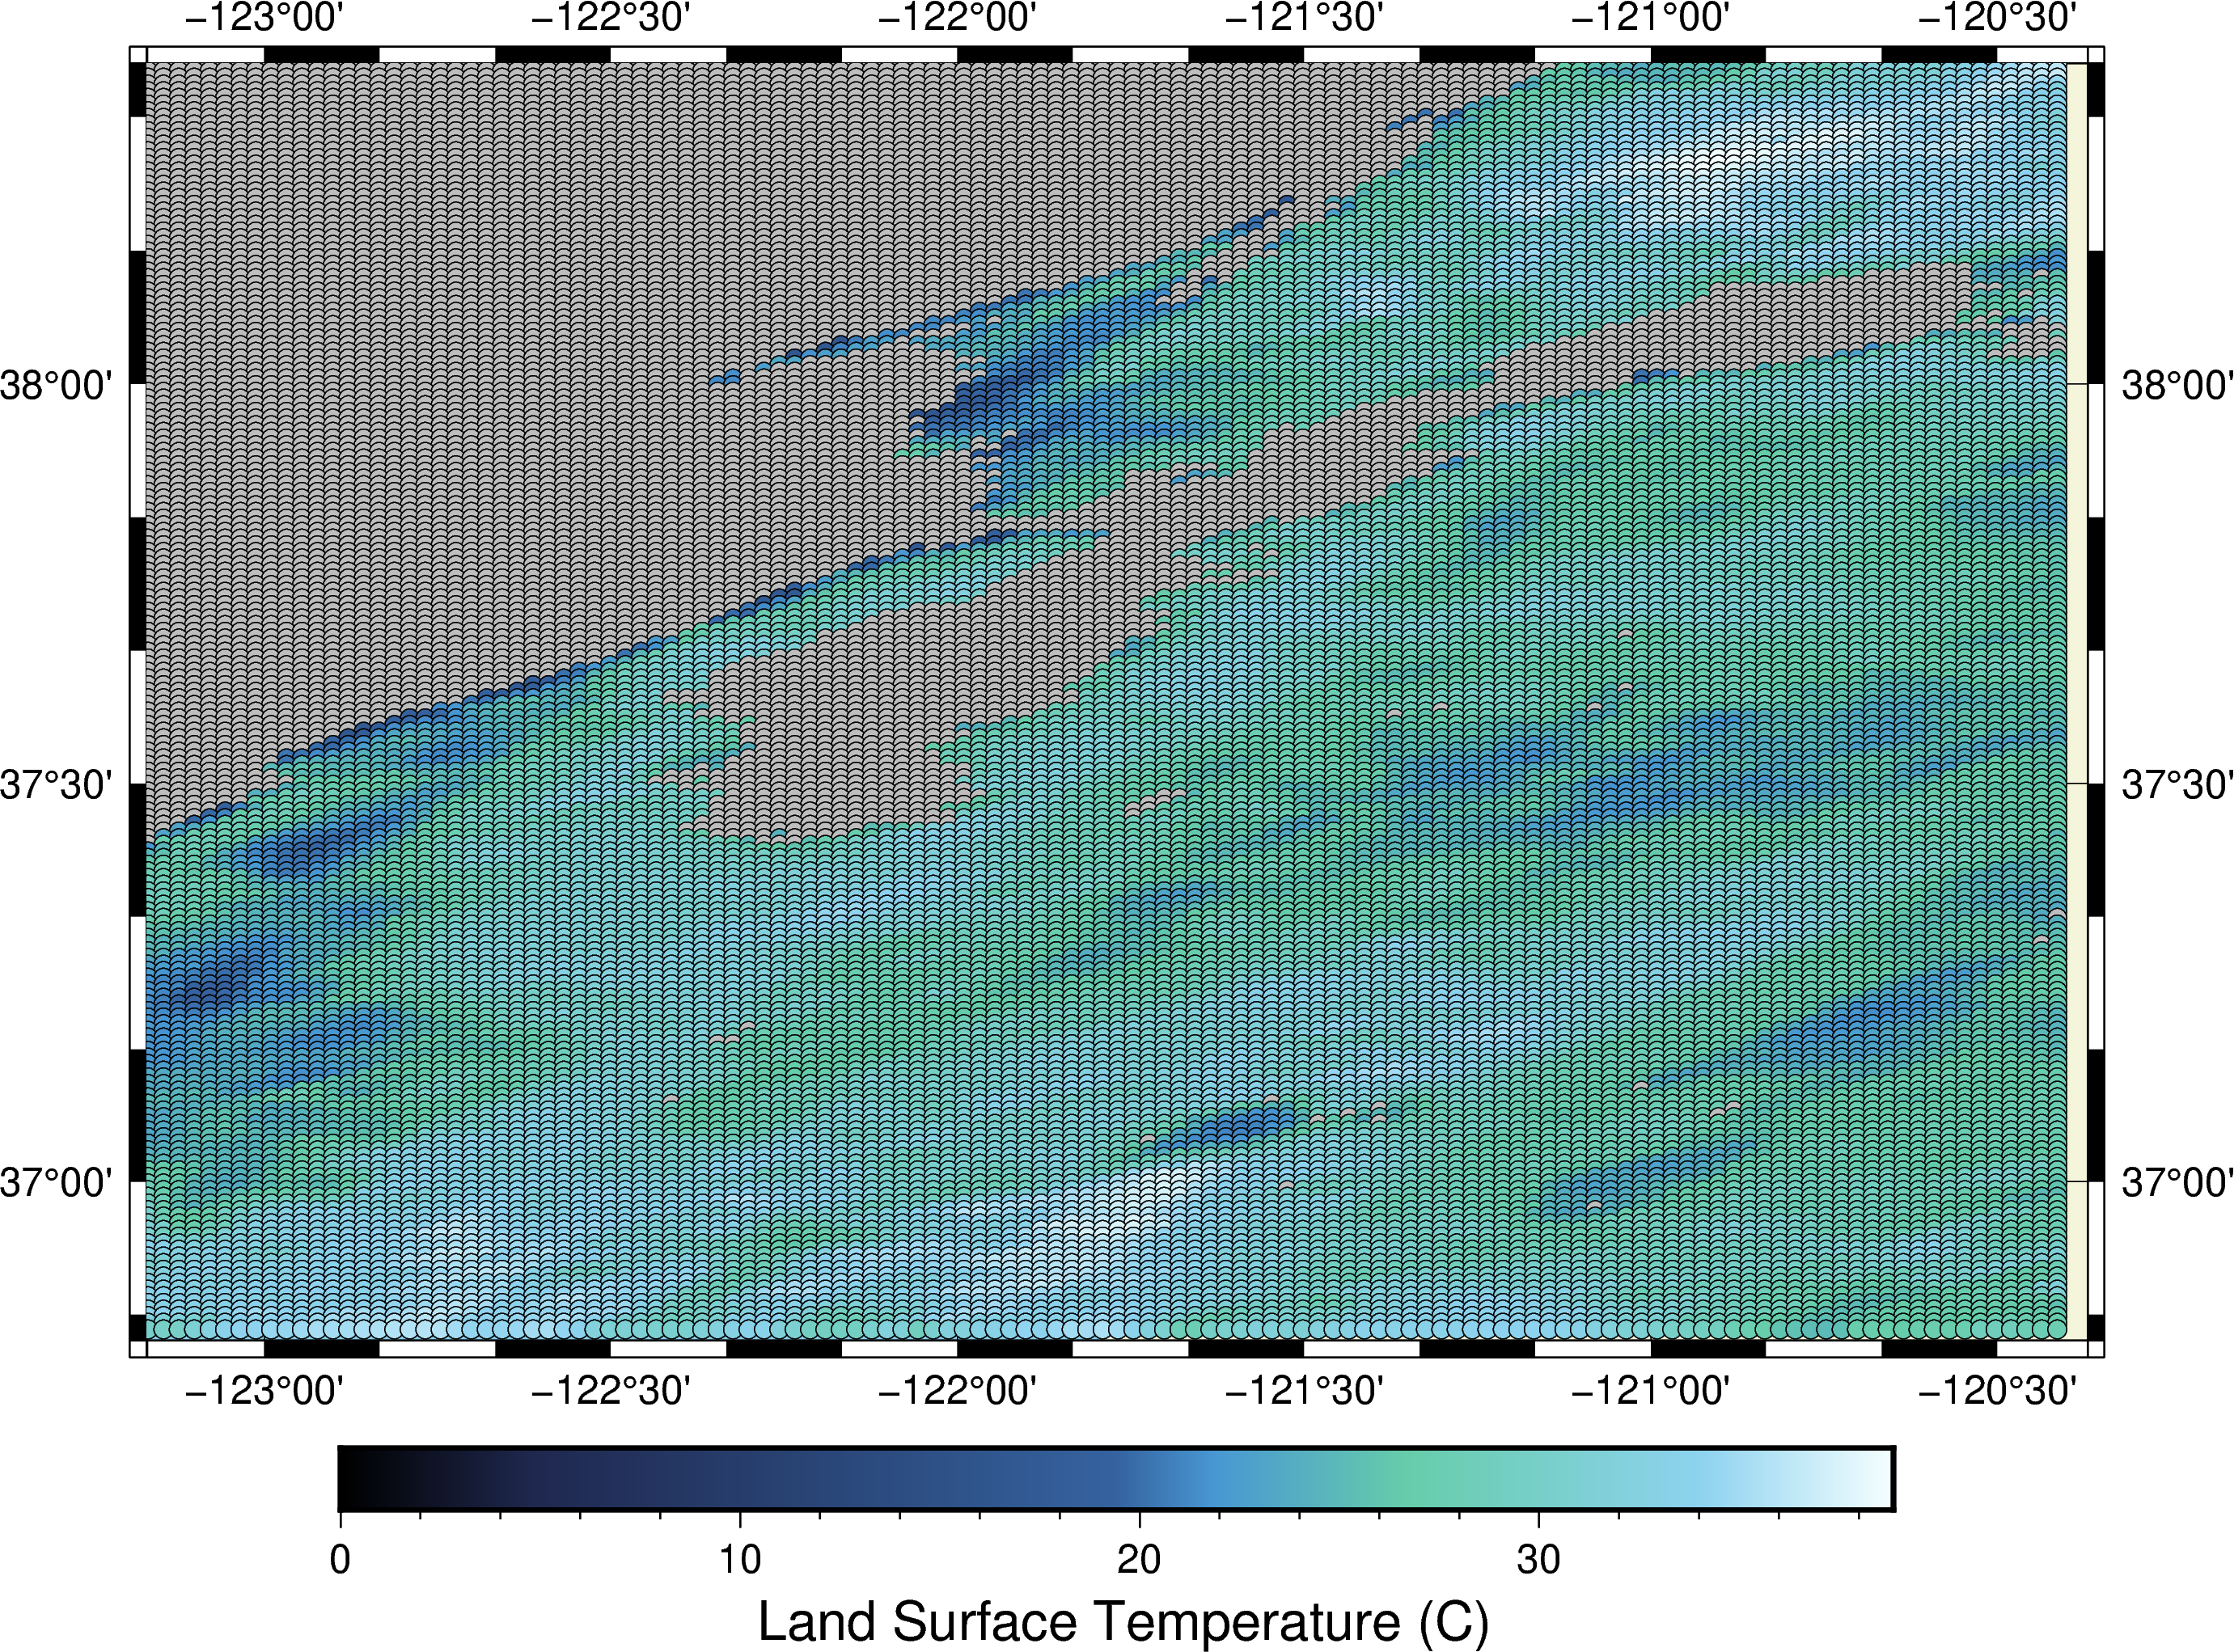

In [51]:
# map the data
yyyy, mm, dd= selected_wf.iloc[3]["Year"], selected_wf.iloc[3]['Month'], selected_wf.iloc[3]['Day']
lon, lat, sf_data = RetrieveData.extract_surface_temperature_data(str(yyyy),str(mm),str(dd), "Data/")

fig= make_map(lon, lat, sf_data, "bathy", 'af+l" Land Surface Temperature (C)"')
fig.show(width = 1000)

The nearest surface temperature datapoint is 0.349 degrees away at longitude -122.168, latitude 38.048


plot [WARNING]: Length <unit> m not supported - revert to default unit [cm]
plot [WARNING]: Length <unit> m not supported - revert to default unit [cm]
plot [WARNING]: Length <unit> m not supported - revert to default unit [cm]
colorbar [ERROR]: CPT <stdin> has no z-slices!
[Session pygmt-session (156)]: Error returned from GMT API: GMT_CPT_READ_ERROR (8)
[Session pygmt-session (156)]: Error returned from GMT API: GMT_CPT_READ_ERROR (8)


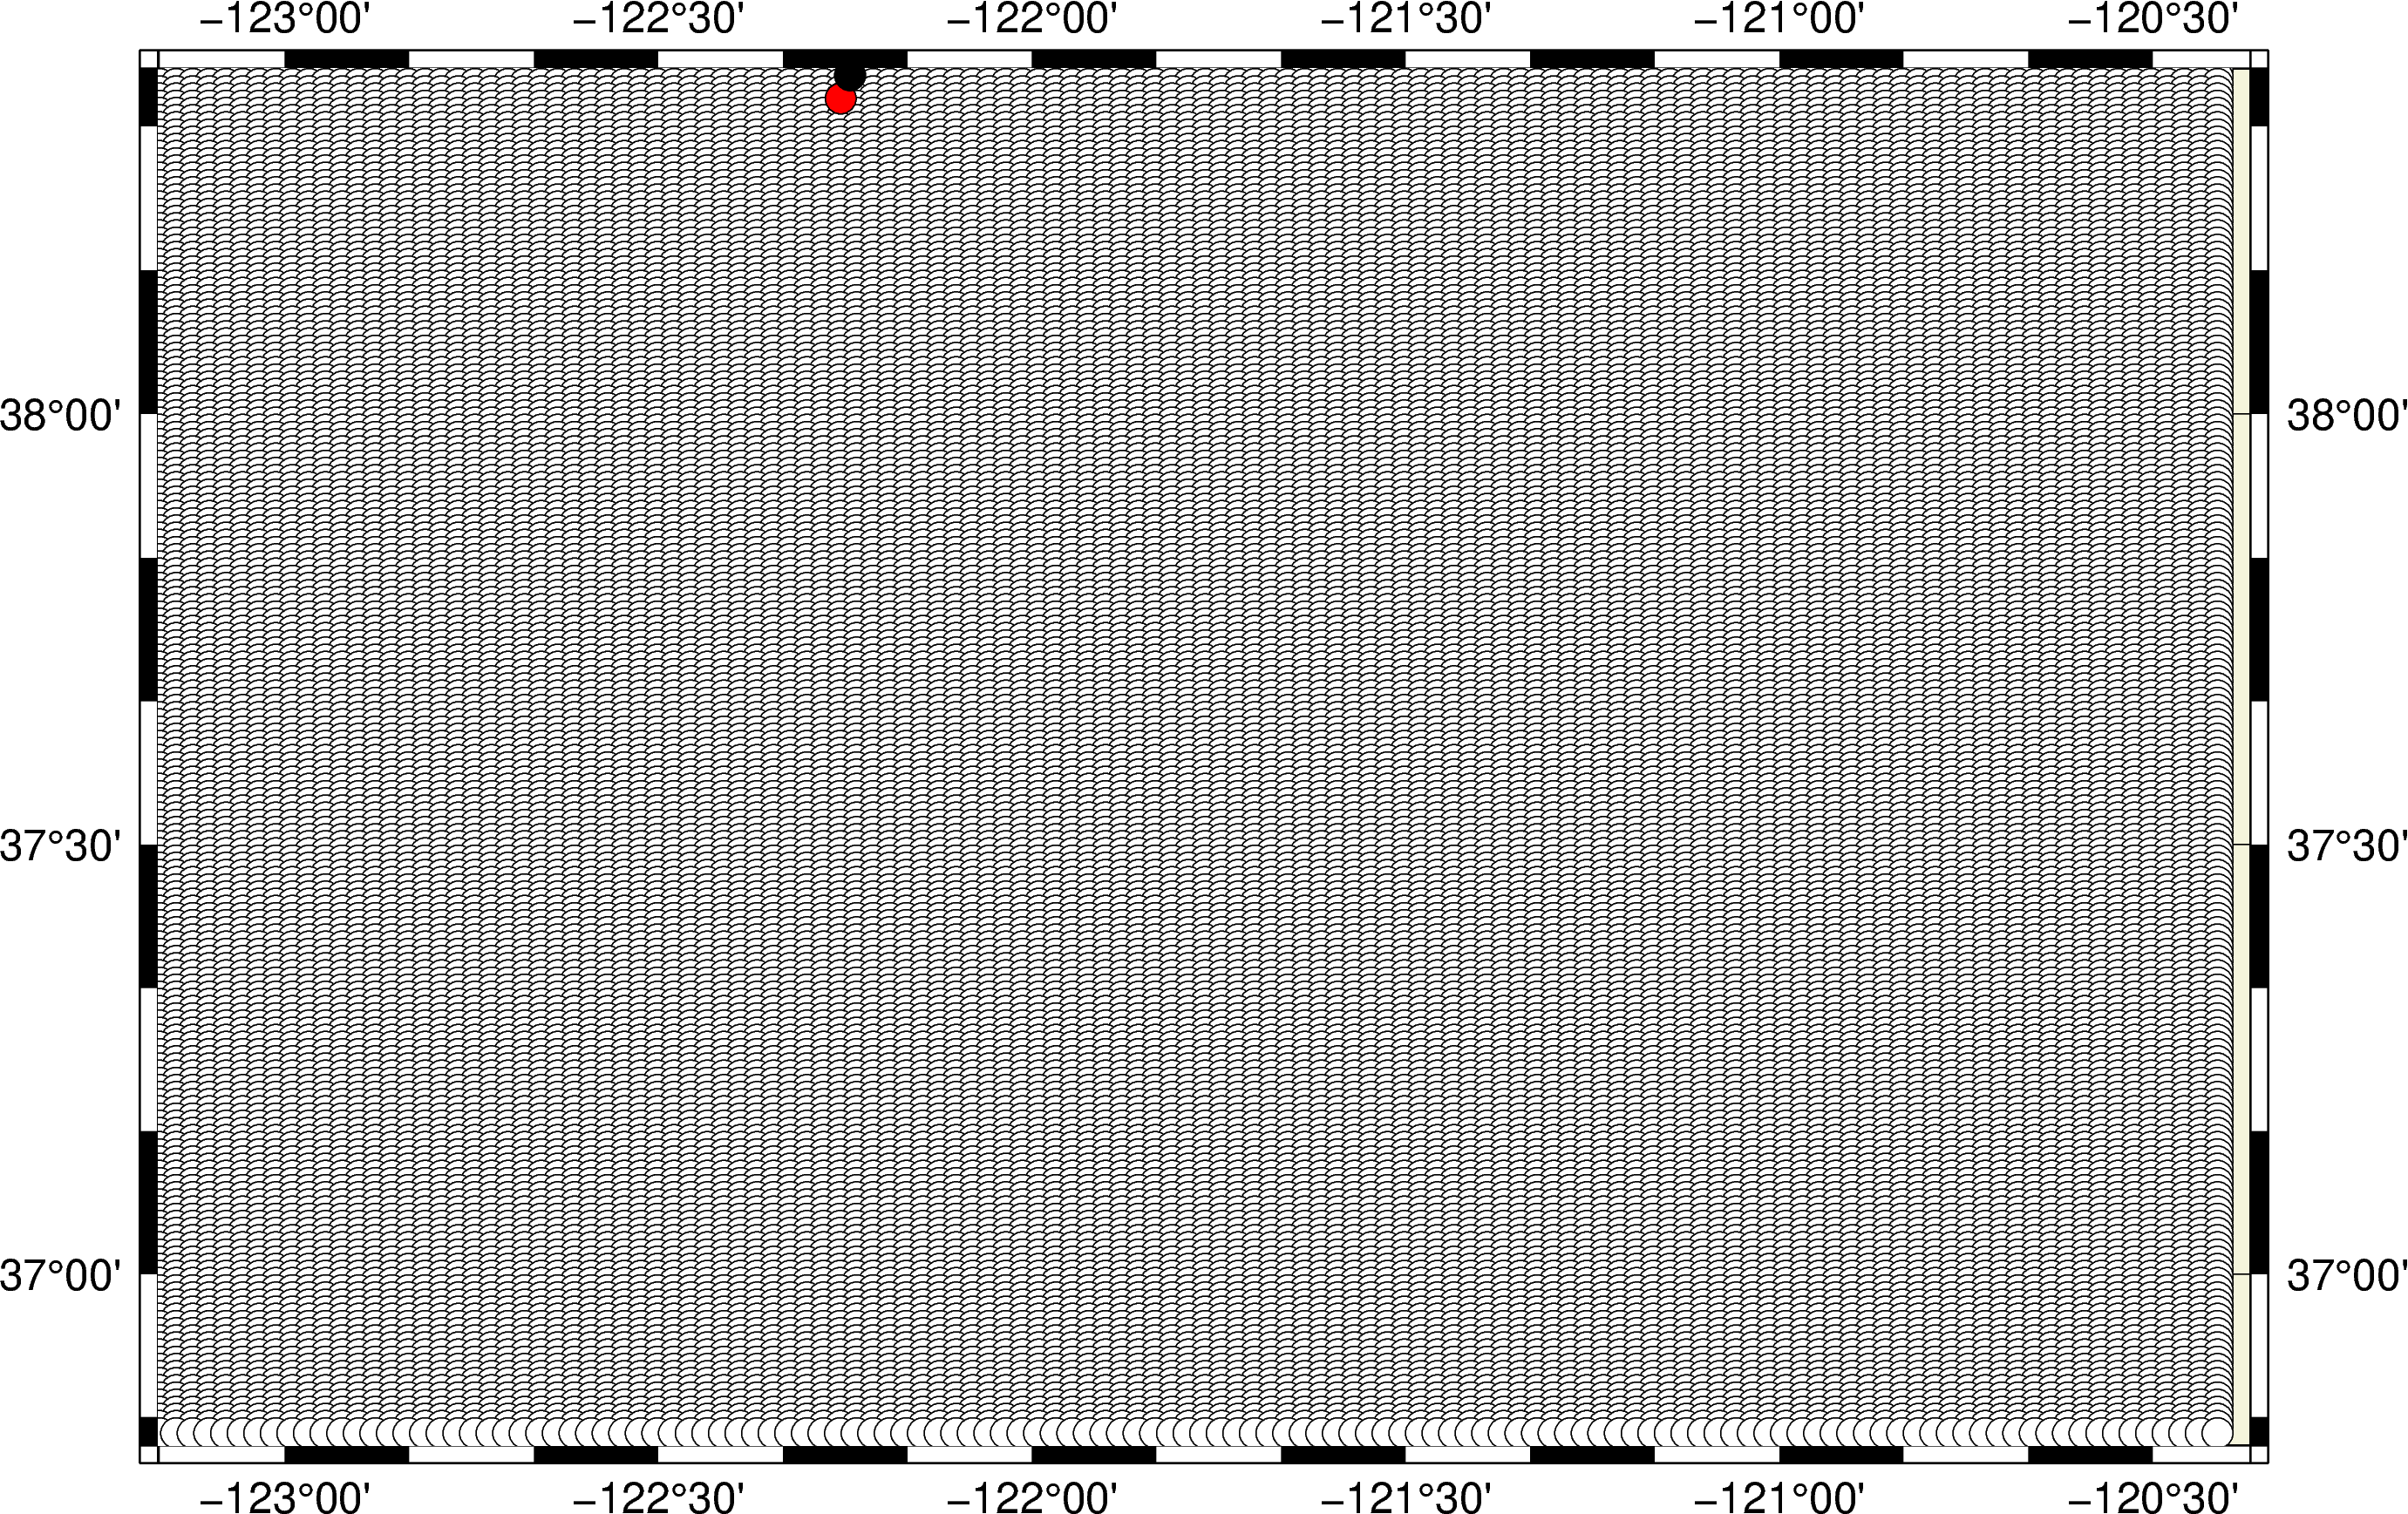

In [52]:
# find the nearest precipitation datapoint, test visually 
surface_temp, deg_dist,lon, lat =  find_nearest_data(str(yyyy), str(mm), str(dd), "Data/", "Surface_Temperature")
print("The nearest surface temperature datapoint is {:.3f} degrees away at longitude {:.3f}, latitude {:.3f}".format(deg_dist,lon, lat))


fig = visual_distance_test(yyyy, mm, dd, "Data/", "Surface_Temperature")
fig.show(width = 1000)

In [53]:
# find the nearest data point to every wildfire
find_nearest_data(str(yyyy), str(mm), str(dd), "Data/", "Surface_Temperature")

nearest_data = selected_wf.apply(lambda x: find_nearest_data(str(x['Year']), str(x['Month']), str(x['Day']), "Data/", "Surface_Temperature"), axis = 1, result_type="expand")
selected_wf['Surface_Temperature'], selected_wf['Surface_Temperature_deg_dist']= nearest_data[0], nearest_data[1]

selected_wf

IncidentId                              UniqueId  \
1808        2580  22c6ea3c-304c-4b3b-bfba-7c9dfc63d9da   
1807        2577  d19ac7c7-c899-4600-82c9-fe24dc29f3c9   
409         1066  13466833-32d1-418b-b145-f7ce1f7bf66e   
981         1640  676946dc-1b38-4a09-9bbe-9ce638cfed52   
1154        1812  4efc7855-ecbf-4507-8435-399e23a91fef   

                                                  Name  \
1808                             SCU Lightning Complex   
1807  CZU Lightning Complex (Including Warnella Fire)    
409                                         Butte Fire   
981                  Atlas Fire (Southern LNU Complex)   
1154                                      Waverly Fire   

                                               Location   Latitude  \
1808  Multiple locations throughout Santa Clara Coun...  37.439437   
1807  Various locations across San Mateo and Santa C...  37.171620   
409                                     east of Jackson  38.329740   
981       Off of Altas Peak Rd, south of Lake Berryessa  38.392060   
1154  off North Waverly Road and North Shelton Road,...  38.052055   

       Longitude  AcresBurnedDisplay PercentContainedDisplay  \
1808 -121.304350            396624.0                    100%   
1807 -122.222750             86509.0                    100%   
409  -120.704180             70868.0                    100%   
981  -122.243670             51624.0                    100%   
1154 -120.945482             12300.0                    100%   

                                           CountiesList          UpdatedDate  \
1808  Santa Clara, Alameda, Contra Costa, San Joaqui...  2020-10-01 10:29:40   
1807                              Santa Cruz, San Mateo  2020-09-23 15:43:36   
409                                                 NaN  2015-10-15 19:45:00   
981                                        Napa, Solano  2019-10-25 08:47:30   
1154                                        San Joaquin  2019-10-25 09:32:06   

      ...                Cause  Year Month Day Soil_Moisture  \
1808  ...              Unknown  2020     8  18      0.105231   
1807  ...            Lightning  2020     8  16      0.236015   
409   ...          Power Lines  2015     9   9      0.031756   
981   ...  Under Investigation  2017    10   8      0.198719   
1154  ...              Unknown  2018     6  29      0.109848   

     Soil_Moisture_deg_dist  Precipitation_GPM  Precipitation_deg_dist  \
1808               0.039565           0.105231                0.039565   
1807               0.048457           0.236015                0.048457   
409               10.305342           0.031756               10.305342   
981                0.027976           0.198719                0.027976   
1154               0.039565           0.109848                0.039565   

      Surface_Temperature  Surface_Temperature_deg_dist  
1808                33.93                      0.068506  
1807                42.17                      0.835993  
409                 46.01                      0.002532  
981                 16.53                      0.348748  
1154                32.97                      0.046373  

[5 rows x 25 columns]

### &emsp; e. Land Cover

The National Land Cover Database (NLCD) is a data product derived from the imagery collected by the NASA/USGS [Landsat satellite](https://landsat.gsfc.nasa.gov/). The data is the relative fractional cover of rangeland components in every 30m x 30m pixel with 25% or less tree canopy cover. The rangeland components include bare ground (i.e. exposed soil sand rocks), shrubland, herbaceous, litter (i.e. dead woody vegetation, detached organic matter), and sagebrush. The 2016 dataset covers the Western United States.The data product is distributed by the [Multi-Resolution Land Characteristics Consortium](https://www.mrlc.gov/data/type/rangeland-basemap)




We'll extract the land cover composition at the pixel that contains the starting location of each wildfire.

In [54]:
herbaceous = RetrieveData.extract_land_cover_data("Data/National_Land_Cover/nlcd_herb_2018_mos_v1_A9t1z5HyXNsnheVSe7sj.tiff")
barren = RetrieveData.extract_land_cover_data("Data/National_Land_Cover/nlcd_litter_2018_mos_v1_A9t1z5HyXNsnheVSe7sj.tiff")
litter = RetrieveData.extract_land_cover_data("Data/National_Land_Cover/nlcd_litter_2018_mos_v1_A9t1z5HyXNsnheVSe7sj.tiff")
sagebrush = RetrieveData.extract_land_cover_data("Data/National_Land_Cover/nlcd_sage_2018_mos_rec_v1_A9t1z5HyXNsnheVSe7sj.tiff")
shrubland = RetrieveData.extract_land_cover_data("Data/National_Land_Cover/nlcd_shrub_2018_mos_v1_A9t1z5HyXNsnheVSe7sj.tiff")


land_cover_datasets = [herbaceous, barren, litter, sagebrush, shrubland]
land_cover_labels = ["herbaceous", "barren","litter", "sagebrush", "shrubland"]

In [55]:
for dataset, category in zip(land_cover_datasets, land_cover_labels):
    results = []
    for lat, lon in zip(selected_wf['Latitude'], selected_wf['Longitude']):
        try:
            lo, la, datapoint = RetrieveData.find_nearest_land_cover_datapoint(lon, lat, dataset)
            results.append(datapoint)
        except:
            print("Error occured at {} {}, {}".format(lon, lat, category))
            error_log.loc[len(error_log.index)] = [category, "-", "-", "-", "Not found {} {}".format(lon, lat)]

            results.append(np.nan)
    selected_wf[category] = results
    

Error occured at -120.70418000000001 38.32974, herbaceous
Error occured at -120.70418000000001 38.32974, barren
Error occured at -120.70418000000001 38.32974, litter
Error occured at -120.70418000000001 38.32974, sagebrush
Error occured at -120.70418000000001 38.32974, shrubland


The dataframe selected_wf now contains the calfire wildfire information (lat, lon, acres burned, start date, etc), and a few physical conditions on the day preceding the wildfire-  soil moisture, precipitation, surface temperature, and land cover composition. 


We applied the same technique to all 206 wildfires in the San Francisco region. You can find the dataset in Data/assembled_pre_wildfire_conditions.csv

In [56]:
conditions = pd.read_csv("./Data/assembled_pre_wildfire_conditions.csv")

N = conditions['Name'].size
print("Total Wildfires: \t\t\t{}".format(N))

Total Wildfires: 			206


# 2. Exploratory Data Analysis and Visualizations 

We can now visualize the data.

In [57]:
# distribution
from ipywidgets import widgets
import matplotlib.pyplot as plt
%matplotlib inline

X = conditions[["Surface_Temperature", "Precipitation_GPM", "Soil_Moisture", "Acres_Burned"]]
X['Acres_Burned'] = np.log(X['Acres_Burned'])
y = np.log(conditions['Acres_Burned'].values)
           

labels = { "Surface_Temperature":"Surface Temperature", 
          "Precipitation_GPM": "Precipitation", 
          "Soil_Moisture": "Soil Moisture", 
          "Acres_Burned":"Acres Burned"
}


def conditions_distribution_plot(X, y):
    def plotter(column):
        plt.figure(1, (10,8))
        valid_rows = X[column].notna()
        plt.hist(X.loc[valid_rows, column])
        plt.xlabel(labels[column])
        plt.ylabel('Frequency')
    
    return plotter

dropdown_values = {labels[var]:var for var in X.columns}
widgets.interact(conditions_distribution_plot(X, y), column=dropdown_values);

interactive(children=(Dropdown(description='column', options={'Surface Temperature': 'Surface_Temperature', 'P…

In [58]:
# scatter plot 
def conditions_scatter_plot(X, y):
    def plotter(column):
        plt.figure(1, (10,8))
        valid_rows = X[column].notna()
        plt.plot(X.loc[valid_rows, column], y[valid_rows], '.')
        plt.xlabel(labels[column])
        plt.ylabel('Acres Burned')
    
    return plotter

Z = X.drop("Acres_Burned", axis = 1)
dropdown_values = {labels[var]:var for var in Z.columns}
widgets.interact(conditions_scatter_plot(Z, y), column=dropdown_values);

interactive(children=(Dropdown(description='column', options={'Surface Temperature': 'Surface_Temperature', 'P…

In [59]:
# joint plot physical variable vs. acres burned
def conditions_joint_plot(X, y):
    def plotter(column):
        plt.figure(1, (10,8))
        valid_rows = X[column].notna()
        sns.jointplot(x = "Acres_Burned", y = column, data = X)

    
    return plotter

dropdown_values = {labels[var]:var for var in X.columns}
widgets.interact(conditions_joint_plot(X, y), column=dropdown_values);

interactive(children=(Dropdown(description='column', options={'Surface Temperature': 'Surface_Temperature', 'P…

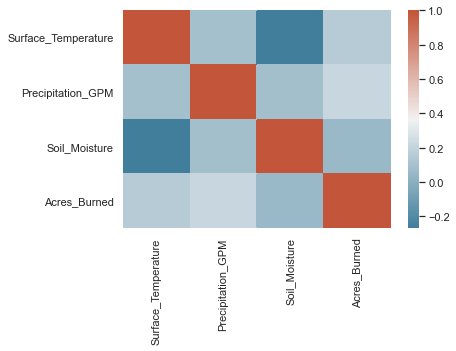

In [60]:
# correlation
correlation = X.corr()
sns.heatmap(correlation, cmap = sns.diverging_palette(230,20,as_cmap=True));

In [61]:
#correlation
correlation = X.corr(method = "pearson")

for var in X.columns:
    print("The pearson correlation coefficient between Acres Burned and {} is {:.3f}".format(var, correlation[var]['Acres_Burned']))


The pearson correlation coefficient between Acres Burned and Surface_Temperature is 0.156
The pearson correlation coefficient between Acres Burned and Precipitation_GPM is 0.220
The pearson correlation coefficient between Acres Burned and Soil_Moisture is 0.054
The pearson correlation coefficient between Acres Burned and Acres_Burned is 1.000


Surface temperature, precipitation, and soil moisture in the region surrounding the wildfire on the day preceding the wildfire does not seem to be strongly correlated with the number of acres that end up burning during the wildfire. 

In [62]:
# group by month, distribution
def month_plot(X, y, label):
    def plotter(column):
        plt.figure(1, (10,8))
        plt.bar(monthly_labels, X[column])
        plt.ylabel(label)
        plt.title(column)
    
    return plotter

months = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct",11:"Nov", 12:"Dec"}
cols = list(labels.keys())
cols.append("Month")

monthly_data = conditions[cols].groupby("Month").count()
monthly_labels = [months[i] for i in monthly_data.index.values]


dropdown_values = {labels[var]:var for var in labels}
widgets.interact(month_plot(monthly_data, y, "Count"), column=dropdown_values);

interactive(children=(Dropdown(description='column', options={'Surface Temperature': 'Surface_Temperature', 'P…

The number of wildfires peaks in June and July while the number of acres_burned peaks  in August. These correspond to the wildfire season in California which runs from June to October.

In [63]:
# group by month - sum total
monthly_data = conditions[cols].groupby("Month").sum()

dropdown_values = {labels[var]:var for var in labels}
widgets.interact(month_plot(monthly_data, y, "Sum Total"), column=dropdown_values);

interactive(children=(Dropdown(description='column', options={'Surface Temperature': 'Surface_Temperature', 'P…

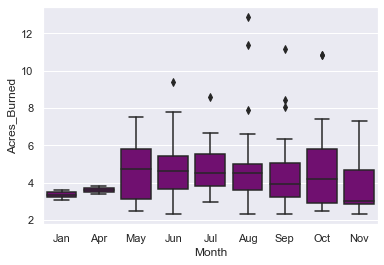

In [84]:
# group by month, box plot
ax = sns.boxplot(y = np.log(conditions['Acres_Burned']), x= "Month",data = conditions, color = "purple")
ax.set_xticklabels(monthly_labels);

In [66]:
# time series - group by month, summary statistics
summary_statistics = conditions.groupby("Month").describe()
for var in X.columns:
    print(labels[var])
    print(summary_statistics[var])
    print("\n\n")

Surface Temperature
       count       mean       std    min     25%    50%     75%    max
Month                                                                 
1        2.0  19.280000  1.060660  18.53  18.905  19.28  19.655  20.03
4        0.0        NaN       NaN    NaN     NaN    NaN     NaN    NaN
5       10.0  30.012000  9.723285  14.87  22.665  29.61  38.770  42.47
6       22.0  30.627273  9.469903  12.73  25.205  30.19  36.075  48.21
7       25.0  31.766800  9.615040  16.87  23.670  32.51  37.370  54.01
8       15.0  34.314000  8.577939  15.31  30.750  33.93  41.920  44.59
9       15.0  35.604667  7.273704  26.61  29.900  32.45  42.750  46.01
10      17.0  22.515882  4.602596  12.41  18.290  24.13  25.690  28.49
11       5.0  18.554000  4.214935  13.55  16.330  17.07  22.230  23.59



Precipitation
       count      mean       std  min       25%       50%       75%        max
Month                                                                         
1        2.0  0.003535  

In [67]:
#map conditions preceding a wildfire
def conditions_map(conditions):
    def plot_feature(feature, cmap= "oleron"):
        plt.figure(1, (10,8))
        fig = pygmt.Figure()
        SFLats, SFLons = [36.8, 38.4], [-123.17,-120.37]
        fig.coast(region = [SFLons[0], SFLons[1], SFLats[0], SFLats[1]], frame = "afg", projection = "Cyl_stere/0/-20/8i" , borders = "2/1p,black", land = "beige", water = "skyblue")
        pygmt.makecpt(cmap = cmap, series = [0, conditions[feature].max()])
        fig.plot(x = conditions['Longitude'].values, y = conditions['Latitude'].values , style= "c0.3cm", color =conditions[feature].values, cmap= True, pen = "black")
        fig.colorbar(frame = 'af+l"{}"'.format(feature))

        return fig 
    
    return plot_feature

dropdown_values = {labels[var]:var for var in X.columns}
widgets.interact(conditions_map(conditions), feature=dropdown_values);

interactive(children=(Dropdown(description='feature', options={'Surface Temperature': 'Surface_Temperature', '…

# 3. Analysis 

### &emsp; a. Assume a wildfire occurs and predict the number of acres that will burn

In [85]:
from sklearn.linear_model import LinearRegression

# metrics
from sklearn import metrics

# polynomial features
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline

# ridge regression
from sklearn.linear_model import Ridge


# display pipeline or columntransformer
from sklearn import set_config
set_config(display="diagram")

# decision tree model 
from sklearn.tree import DecisionTreeRegressor

# visualize decision trees and graphs
import graphviz
from sklearn.tree import export_graphviz

#train on the training set, test on the validation set
from sklearn.model_selection import train_test_split

# grid search 
from sklearn.model_selection import GridSearchCV

# random forest regressor
from sklearn import ensemble

# decision tree regressor
from sklearn import tree

# datetime objects
from datetime import datetime

# shuffle split 
from sklearn import model_selection 

In [69]:
# linear regressor with multiple features (entire dataset)
variable = ["Surface_Temperature", "Soil_Moisture", "Precipitation_GPM"]
formatted_data = conditions[["Acres_Burned", "Surface_Temperature", "Soil_Moisture", "Precipitation_GPM"]].dropna()


lr = LinearRegression()
lr.fit(formatted_data[variable],formatted_data['Acres_Burned'])
y_pred = lr.predict(formatted_data[variable])



# get the coefficients
print("y intercept:\t{}".format(lr.intercept_))
print("coeff:\t\t{}\n\n".format(lr.coef_))



# quantify how well the model predicts the acres burned using metrics 
mean_absolute_error = metrics.mean_absolute_error(formatted_data["Acres_Burned"], y_pred)
print("Mean absolute error:\t{}".format(mean_absolute_error))

mean_squared_error = metrics.mean_squared_error(formatted_data["Acres_Burned"], y_pred)
print("Mean squared error:\t{}".format(mean_squared_error))

#r2 = metrics.r2_score(formatted_data["Acres_Burned"], y_pred)
r2 = lr.score(formatted_data[variable],formatted_data['Acres_Burned'])
print("R^2:\t\t\t{}".format(r2))

print(('\n\nprediction = ' +
       '{} +\n'.format(lr.intercept_) +
       ' +\n'.join(['{} * {}'.format(n, f) for f, n in zip(variable, lr.coef_)])))

y intercept:	13653.31390199634
coeff:		[  -421.76544873   8885.02398095 -12381.79400587]


Mean absolute error:	6372.445833739485
Mean squared error:	127509017.6990277
R^2:			0.09628175417496287


prediction = 13653.31390199634 +
-421.7654487268685 * Surface_Temperature +
8885.023980951359 * Soil_Moisture +
-12381.794005870646 * Precipitation_GPM


In [70]:
# linear regressor with multiple features (dataset split into a training set and a testing set)
all_columns =["Soil_Moisture", "Surface_Temperature", "Precipitation_GPM"]

x_train, x_valid, y_train, y_valid = train_test_split(formatted_data[all_columns], formatted_data["Acres_Burned"], test_size = .2, random_state = 42, shuffle=True)

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_valid)



# get the coefficients
print("y intercept:\t{}".format(lr.intercept_))
print("coeff:\t\t{}\n\n".format(lr.coef_))



# quantify how well the model predicts the acres burned using metrics 
mean_absolute_error = metrics.mean_absolute_error(y_valid, y_pred)
print("Mean absolute error:\t{}".format(mean_absolute_error))

mean_squared_error = metrics.mean_squared_error(y_valid, y_pred)
print("Mean squared error:\t{}".format(mean_squared_error))

r2 = lr.score(x_valid, y_valid)
#r2 = metrics.r2_score(y_valid, y_pred)
print("R^2:\t\t\t{}".format(r2))
#r2 = lr.score(formattedData[variable],formattedData['Acres_Burned'])

print(('\n\nprediction = ' +
       '{} +\n'.format(lr.intercept_) +
       ' +\n'.join(['{} * {}'.format(n, f) for f, n in zip(variable, lr.coef_)])))


y intercept:	13755.191921185142
coeff:		[ 20173.2371495    -468.08143752 -13877.73417413]


Mean absolute error:	3738.2663713782135
Mean squared error:	25031193.021365125
R^2:			-24783.89314572944


prediction = 13755.191921185142 +
20173.237149503402 * Surface_Temperature +
-468.081437523586 * Soil_Moisture +
-13877.734174132402 * Precipitation_GPM


In [71]:
# Linear regressorwith the addition of polynomial features
polynomial_degree = 2

variable = ["Surface_Temperature", "Soil_Moisture", "Precipitation_GPM"]
formattedData = conditions[["Surface_Temperature", "Soil_Moisture", "Precipitation_GPM", "Acres_Burned"]].dropna()
y = formattedData['Acres_Burned']
formattedData = formattedData[variable]


# create a pipeline- sequence of preprocessing steps ending with the creation of an instance of the final model (regressor)
lr_poly = Pipeline([ ("standard_scaler", MinMaxScaler((-1,1))),
                    ('polynomial_transformation', PolynomialFeatures(polynomial_degree)),
                    ("lr", LinearRegression())
])

lr_poly.fit(formattedData,y)
y_pred = lr_poly.predict(formattedData)


print('Training R^2:', lr_poly.score(formattedData, y))

Training R^2: 0.3797811919524251


In [72]:
# increase number of polynomial features
degrees = np.arange(1, 7, 1)
for deg in degrees:
    lr_poly = Pipeline([ ("standard_scaler", MinMaxScaler((-1,1))),
                    ('polynomial_transformation', PolynomialFeatures(deg)),
                    ("lr", LinearRegression())
    ])

    lr_poly.fit(formattedData,y)
    y_pred = lr_poly.predict(formattedData)


    print('Degree {}\t  R^2:'.format(deg), lr_poly.score(formattedData, y))

Degree 1	  R^2: 0.09628175417496287
Degree 2	  R^2: 0.3797811919524251
Degree 3	  R^2: 0.8257200814812646
Degree 4	  R^2: 0.9386128176180344
Degree 5	  R^2: 0.9996608032070604
Degree 6	  R^2: 1.0


In [73]:
#ridge to penalize for some of the complexity
deg = 4
for alpha in np.arange(0, 10, 1):
    ridge_est = Pipeline([ ("standeard_scaler", MinMaxScaler((-1,1))), 
                          ("polynomial_trans", PolynomialFeatures(deg)), 
                          ("ridge", Ridge(alpha = alpha))    
    ])


    ridge_est.fit(formattedData, y)
    y_pred = ridge_est.predict(formattedData)

    print("degree:\t {} alpha:\t {} R2:\t {}".format(deg, alpha, ridge_est.score(formattedData, y)))

degree:	 4 alpha:	 0 R2:	 0.9102672656934381
degree:	 4 alpha:	 1 R2:	 0.29095953527471086
degree:	 4 alpha:	 2 R2:	 0.26563666354366844
degree:	 4 alpha:	 3 R2:	 0.2502745923604127
degree:	 4 alpha:	 4 R2:	 0.23863124653758205
degree:	 4 alpha:	 5 R2:	 0.22905614153324194
degree:	 4 alpha:	 6 R2:	 0.2208433796315824
degree:	 4 alpha:	 7 R2:	 0.2136151696728218
degree:	 4 alpha:	 8 R2:	 0.20714131647973677
degree:	 4 alpha:	 9 R2:	 0.2012691091090998


In [74]:
# b. Decision Tree Regressor Model
# i. 
formatted_data = conditions[["Soil_Moisture", "Surface_Temperature", "Precipitation_GPM", "Acres_Burned"]].dropna(subset = ['Surface_Temperature', "Soil_Moisture", "Precipitation_GPM"])

est = DecisionTreeRegressor(max_depth = 2)

est.fit(formatted_data[all_columns], formatted_data["Acres_Burned"])
est.score(formatted_data[all_columns], formatted_data['Acres_Burned'])

0.9762224308081054

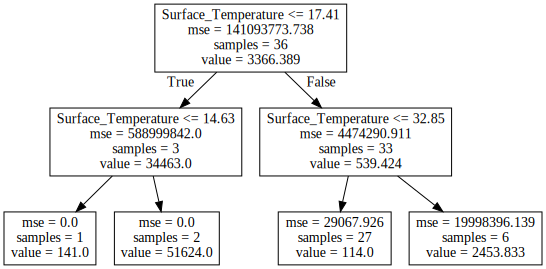

In [75]:
graphviz.Source(export_graphviz(est, feature_names= all_columns))

In [76]:
for max_depth in range(1, 6, 1):
    est = DecisionTreeRegressor(max_depth = max_depth)

    est.fit(formatted_data[all_columns], formatted_data["Acres_Burned"])
    r2 = est.score(formatted_data[all_columns], formatted_data['Acres_Burned'])
    
    print("Max depth: {}   R2: {}".format(max_depth, r2))

Max depth: 1   R2: 0.623053859197404
Max depth: 2   R2: 0.9762224308081054
Max depth: 3   R2: 0.9991956630325428
Max depth: 4   R2: 0.9999599957970878
Max depth: 5   R2: 0.9999986905351997


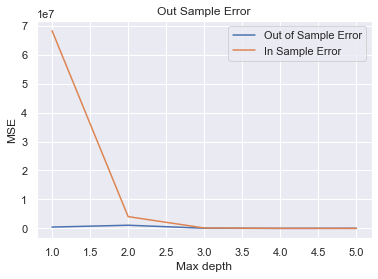

In [77]:
x_train, x_valid, y_train, y_valid = train_test_split(formatted_data[all_columns], formatted_data["Acres_Burned"], test_size = .2, random_state = 42, shuffle=True)

out_sample_err = []
in_sample_err = []
depths = range(1,6,1)
for max_depth in depths:
    est = DecisionTreeRegressor(max_depth = max_depth)
    est.fit(x_train, y_train)
    
    y_pred = est.predict(x_valid)
    
    mse = metrics.mean_squared_error(y_valid, y_pred) 
    out_sample_err.append(mse)
    mse_in = metrics.mean_squared_error(y_train,est.predict(x_train))
    in_sample_err.append(mse_in)
    
plt.plot(depths, out_sample_err, label = "Out of Sample Error")
plt.plot(depths, in_sample_err, label = "In Sample Error")
plt.ylabel("MSE")
plt.xlabel("Max depth")
plt.title("Out Sample Error")
plt.legend()

In [78]:
# use grid search cross validation to find the optimal hyperparameters
est = DecisionTreeRegressor()
grid_search = GridSearchCV(
    est, 
    {"max_depth":range(1,11)}, 
    cv = 10, 
    n_jobs = 2
)

grid_search.fit(x_train, y_train)
print("The best hyperparameter:   ", grid_search.best_params_)

The best hyperparameter:    {'max_depth': 5}


In [79]:
# modify the other hyperparameters to improve the predictions and determine the ideal values

hyperparams = {"max_features": np.arange(0,20,2), 
              "min_samples_split": np.arange(10,35,1), 
              "min_samples_leaf":np.arange(10,20,1),
              "max_depth":range(1,11)}


for key, value in hyperparams.items():
    est = DecisionTreeRegressor()
    grid_search = GridSearchCV(
        est, 
        {key:value},
        cv = 5, 
        n_jobs = 2
    )
    grid_search.fit(formatted_data[all_columns], formatted_data['Acres_Burned'])

    print("Best hyperparameter for {}:  {}".format(key, grid_search.best_params_))


Best hyperparameter for max_features:  {'max_features': 2}
Best hyperparameter for min_samples_split:  {'min_samples_split': 28}
Best hyperparameter for min_samples_leaf:  {'min_samples_leaf': 13}
Best hyperparameter for max_depth:  {'max_depth': 1}


R^2: -18140.876570963803


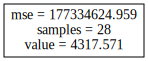

In [80]:
# train a decision tree regressor with the ideal hyperparameters
est = DecisionTreeRegressor(max_features = 2, min_samples_split = 30, min_samples_leaf = 15, max_depth  = 2)

x_train, x_valid, y_train, y_valid = train_test_split(formatted_data[all_columns], formatted_data["Acres_Burned"], test_size = .2, random_state = 42, shuffle=True)
est.fit(x_train, y_train)

# determine how well the model performs

print("R^2: {}".format(est.score(x_valid, y_valid)))

# view the graph of the model 
graphviz.Source(export_graphviz(est))

# determine the weight/influence of each parameter 


In [81]:
def drop(feature):
    cols = ["Surface_Temperature", "Precipitation_GPM", "Soil_Moisture"]
    
    if feature in cols:
        cols.remove(feature)
        
        
        
    # determine best hyperparameters 
    hyperparams = {"max_features": [np.arange(0,3,1)], 
              "min_samples_split": [np.arange(1,35,1)], 
              "min_samples_leaf":[np.arange(1,20,1)],
              "max_depth":[range(1,11)]}


    ideal_params=[]
    for key, value in hyperparams.items():
        est = DecisionTreeRegressor()
        grid_search = GridSearchCV(
            est, 
            {key:value[0]},
            cv = 5, 
            n_jobs = 2
        )
        
        grid_search.fit(formatted_data[all_columns], formatted_data['Acres_Burned'])
        hyperparams[key].append(grid_search.best_params_[key])

    
    # train a decision tree regressor with the ideal hyperparameters
    est = DecisionTreeRegressor(max_features = hyperparams["max_features"][1], min_samples_split = hyperparams['min_samples_split'][1], min_samples_leaf = hyperparams['min_samples_leaf'][1], max_depth  = hyperparams['max_depth'][1])

    x_train, x_valid, y_train, y_valid = train_test_split(formatted_data[cols], formatted_data["Acres_Burned"], test_size = .2, random_state = 42, shuffle=True)
    est.fit(x_train, y_train)

    # determine how well the model performs

    print("{} dropped \t\t R^2: {}".format(feature, est.score(x_valid, y_valid)))

    return est


for feature in all_columns:
    drop(feature)

Soil_Moisture dropped 		 R^2: -435.07309798873695
Surface_Temperature dropped 		 R^2: -55311.943935962896
Precipitation_GPM dropped 		 R^2: -435.07309798873695


Error decision tree 140122854.4375
Error random forest 123304307.49237499
Error extra trees   111914227.010125


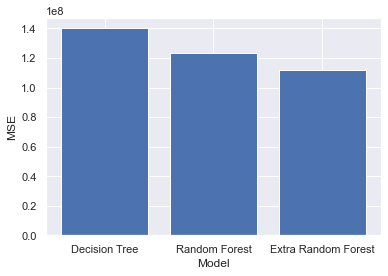

In [82]:
# c. Random Forest Regressor
cv = model_selection.ShuffleSplit(n_splits = 10, test_size = .2, random_state = 42)

def compute_error(clf, X, y):
    return - model_selection.cross_val_score(clf, X, y, cv = cv, scoring ="neg_mean_squared_error").mean()

tree_reg = tree.DecisionTreeRegressor()
forest_reg = ensemble.RandomForestRegressor(n_estimators = 10)
extra_reg = ensemble.ExtraTreesRegressor(n_estimators = 10)


ce_tree = compute_error(tree_reg, formatted_data[all_columns], formatted_data['Acres_Burned'])
ce_forest = compute_error(forest_reg, formatted_data[all_columns], formatted_data['Acres_Burned'])
ce_extra = compute_error(extra_reg, formatted_data[all_columns], formatted_data['Acres_Burned'])

print("Error decision tree {}".format(ce_tree))
print("Error random forest {}".format(ce_forest))
print("Error extra trees   {}".format(ce_extra))


labels = ['Decision Tree', "Random Forest", "Extra Random Forest"]
performance = [ce_tree, ce_forest, ce_extra]
plt.bar(labels, performance)
plt.xlabel('Model')
plt.ylabel("MSE");

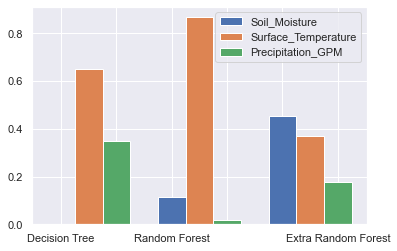

In [83]:
# get the feature importance of the different models 
all_columns

rel_tree = tree_reg.fit(formatted_data[all_columns], formatted_data['Acres_Burned']).feature_importances_
rel_forest = forest_reg.fit(formatted_data[all_columns], formatted_data['Acres_Burned']).feature_importances_
rel_extra = extra_reg.fit(formatted_data[all_columns], formatted_data['Acres_Burned']).feature_importances_

feature_importance = np.array([rel_tree, rel_forest, rel_extra]).transpose()

n = np.arange(3)

fig = plt.figure()
ax= fig.gca() #add_axes(["Decision Tree", "Random Forest", "Extra Random Forest"])
ax.bar(n,feature_importance[0], width = .25, label = "Soil_Moisture")
ax.bar(n+.25, feature_importance[1], width = .25, label = "Surface_Temperature")
ax.bar(n+.5, feature_importance[2], width = .25, label = "Precipitation_GPM")

ax.set_xticklabels(["", "Decision Tree","", "Random Forest","","", "Extra Random Forest", ""])
plt.legend();

### &emsp; b. Predict regional wildifire probability